# **Introduction**

This project looks at how Australian banks changed their asset structure and capital strategy from FY2019 to FY2025. The data comes from APRA (Australian Prudential Regulation Authority) and is updated every year.

The goal is to see how banks reacted to different economic situations, like the COVID-19 crisis and rising interest rates.

We focus on 3 main questions:

- How did total bank assets change over time?

- How did the asset structure change in different periods?

- How do different bank groups manage capital?

This project helps:

- Regulators check if the system is stable,

- Bank managers compare their capital strategies,

- Investors and analysts understand bank trends.

The dataset is called:
“Monthly authorised deposit-taking institution statistics – back-series”
It’s public and can be found on APRA (https://www.apra.gov.au/monthly-authorised-deposit-taking-institution-statistics). It shows asset and liability numbers from banks each month.



---



# **CONTEXT**

To understand why banks changed their strategy, we also look at what was happening in the economy from March 2019 to February 2025. During this time, banks had to face many changes like COVID-19, very low interest rates, and fast rate increases. These events made banks change how they manage money.

We divide this period into six parts:

## **Stable (Mar 2019 → Feb 2020)**

- COVID started. Cities locked down. Borders closed.

- RBA cut interest rates to very low levels.

- Banks held more cash and got more deposits.

- This was a crisis for the economy and banks.

## **Crisis (Mar 2020 → Feb 2021)**

- COVID-19 started in early 2020. The government locked down cities and closed borders.
- The Reserve Bank of Australia (RBA) cut interest rates to record lows.
- Banks increased their cash holdings. Customer deposits also went up strongly.
- This was a crisis period for both the economy and banks.


## **Recovery (Mar 2021 → Feb 2022)**

- Economy recovered. People and businesses spent more.

- Interest rates stayed low. Bank assets grew fast.

- Banks held more liquid assets (cash, securities).

- This was a strong growth period.

## **Rate Hikes (Mar 2022 → Feb 2023)**

- RBA raised interest rates to fight inflation.

- It became more expensive to borrow money.

- Banks had to change their asset and funding plans.

- Loan demand went down.

## **Pressure (Mar 2023 → Feb 2024)**

- Interest rates stayed high.

- Banks felt more pressure on funding and liquidity.

- Some banks played safe by holding more secure assets.

- Asset growth slowed down.

## **Rebalancing (Mar 2024 → Feb 2025)**

- Rate hikes stopped.

- Conditions became more stable.

- Banks started to rebalance their strategy for the future.

- This was a turning point.



---



# **DATA EXPLORATION**

First, let's import some basic libraries for processing data and visualization:

In [ ]:
# Import libraries and mount Google Drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load Data**

We load the Excel file and check the first few rows:

In [ ]:
# Load data from Excel
data = pd.read_excel(
    '/content/drive/MyDrive/Projects/31032025 - Monthly authorised deposit-taking institution statistics back-series March 2019 - February 2025.xlsx',
    sheet_name='Table 1',
    skiprows=1
)

data.head()

,Period,ABN,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,...,Intra-group deposits,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits
0,2025-02-28,48848300367,Agricultural Bank of China Limited,28.6,0.0,5329.3,0.0,8926.6,0.0,3283.7,...,0.0,1619.8,5340.9,1480.0,354.1,107.4,0.0,0.0,0.0,461.5
1,2025-02-28,13627244848,Alex Bank Pty Ltd,7.9,0.0,5.9,0.0,67.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,5.1,0.0,41.8,0.0,47.1
2,2025-02-28,15081596009,AMP Bank Limited,120.8,0.0,5136.0,0.0,33145.2,9346.9,577.5,...,6501.9,405.7,403.0,849.8,2748.6,1343.4,147.8,9946.8,67.1,14253.7
3,2025-02-28,37002950745,Arab Bank Australia Limited,70.0,0.0,210.3,0.0,1309.1,123.4,285.3,...,0.0,0.0,0.0,0.0,307.4,212.7,9.0,422.3,6.7,958.0
4,2025-02-28,11005357522,Australia and New Zealand Banking Group Limited,55256.3,19765.7,70342.4,126.3,764174.8,91871.8,147053.2,...,1873.5,25913.9,75168.8,121131.4,129220.4,73371.7,5843.3,184848.6,4746.1,398030.1


The dataset has monthly data from March 2019 to February 2025.

Each row shows data for one bank in one month.

It includes values like total assets, loans, deposits, and borrowings.

## **Basic information**

We check the structure of the data:

In [ ]:
# Check data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9058 entries, 0 to 9057
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Period                                         9058 non-null   datetime64[ns]
 1   ABN                                            9058 non-null   int64         
 2   Institution Name                               9058 non-null   object        
 3   Cash and deposits with financial institutions  9058 non-null   float64       
 4   Trading securities                             9058 non-null   float64       
 5   Investment securities                          9058 non-null   float64       
 6   Net acceptances of customers                   9058 non-null   float64       
 7   Total residents assets                         9058 non-null   float64       
 8   Total securitised assets on balance sheet      9058 non-nu

Total rows: 9,058

Total columns: 30

Types:

- 1 date column (`Period`)

- 1 text column (`Institution Name`)

- 28 numeric columns (mostly financial values)

3 columns have missing values:

- `Intra-group loans`

- `Intra-group deposits`

- `Negotiable Certificates of Deposit`


## **Split Columns**

We split the columns into three groups:

In [ ]:
# Split columns into categories
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
datetime_cols = data.select_dtypes(include=['datetime']).columns.tolist()

cat_data = data[categorical_cols]
num_data = data[numerical_cols]
date_data = data[datetime_cols]
financial_data = num_data.drop(columns=['ABN'])

print("Categorical:", categorical_cols)
print("\nNumerical:", numerical_cols)
print("\nDatetime:", datetime_cols)

Categorical: ['Institution Name']

Numerical: ['ABN', 'Cash and deposits with financial institutions', 'Trading securities', 'Investment securities', 'Net acceptances of customers', 'Total residents assets', 'Total securitised assets on balance sheet', 'Loans to non-financial businesses', 'Loans to financial institutions', 'Loans to general government', 'Loans to households: Housing: Owner-occupied', 'Loans to households: Housing: Investment', 'Loans to households: Credit cards', 'Loans to households: Other', 'Loans to community service organisations', 'Total residents loans and finance leases', 'Intra-group loans and finance leases', 'Acceptances', 'Intra-group deposits', 'Negotiable Certificates of Deposit', 'Total short-term borrowings', 'Total long-term borrowings', 'Deposits by non-financial businesses', 'Deposits by financial institutions', 'Deposits by general government', 'Deposits by households', 'Deposits by community service organisations', 'Total residents deposits']

Datet

Categorical columns: Only 1 column (`Institution Name`), representing bank identity.

Numerical columns: Most features are numerical (27 variables + 1 identifier `ABN`).

Datetime columns: A single time-based column (`Period`), confirming the dataset has a time series structure.

We remove `ABN` from the numerical data to create 'financial_data' —
this will be used for later analysis (for example: zero checks, ratio computation).


## **Statistic Information**

We check basic statistics of the data:

In [ ]:
# Describe categorical and numerical data
print("Categorical Description:")
display(cat_data.describe())

print("\nNumerical Description:")
display(num_data.describe())

print("\nData coverage period:")
print("From", data['Period'].min().date(), "to", data['Period'].max().date())
print("Number of reporting periods:", data['Period'].nunique(), "(monthly)")

Categorical Description:


,Institution Name
count,9058
unique,150
top,Agricultural Bank of China Limited
freq,72



Numerical Description:


,ABN,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,Loans to general government,...,Intra-group deposits,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits
count,9.058000e+03,9058.000000,9058.000000,9058.000000,9058.000000,9.058000e+03,9058.000000,9058.000000,9058.000000,9058.000000,...,6987.000000,6987.000000,9058.000000,9058.000000,9058.000000,9058.000000,9058.000000,9058.000000,9058.000000,9058.000000
mean,5.515986e+10,2344.774398,881.176926,3232.308203,3.955675,3.892869e+04,5710.827169,7142.128726,1156.300916,156.732314,...,743.936496,2167.864878,2970.931022,4609.546986,5794.554968,3906.662939,836.108810,9882.543409,252.218680,20672.086631
std,2.751903e+10,11081.410243,4698.225227,10994.163583,31.883958,1.575000e+05,24958.254651,27787.043228,4270.824565,1560.859004,...,2388.870069,6235.122466,10270.912229,20385.747080,25181.669560,15269.251608,4547.480532,42926.945070,1259.816664,87603.876133
min,1.100536e+10,0.000000,-2792.400000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.208765e+10,39.225000,0.000000,116.825000,0.000000,8.727500e+02,0.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.700000,2.700000,0.000000,0.000000,0.000000,237.900000
50%,5.106487e+10,107.650000,0.000000,392.900000,0.000000,2.914400e+03,0.000000,191.750000,3.600000,0.000000,...,0.000000,138.600000,60.450000,5.800000,105.300000,101.200000,0.000000,273.750000,2.300000,1033.750000
75%,8.208765e+10,403.125000,0.000000,2027.050000,0.000000,1.261690e+04,455.850000,2650.075000,172.925000,0.000000,...,31.300000,760.600000,583.450000,728.575000,591.350000,556.525000,30.400000,1768.100000,33.800000,5333.975000
max,9.961894e+10,103355.200000,56174.700000,103480.200000,616.500000,1.178399e+06,205197.700000,233295.500000,38304.100000,25081.100000,...,19689.200000,40289.200000,91174.300000,156173.800000,182514.200000,124908.600000,56029.200000,418741.900000,16569.200000,749986.000000



Data coverage period:
From 2019-03-31 to 2025-02-28
Number of reporting periods: 72 (monthly)


Summary statistics of this dataset:

- Categorical: 150 unique institutions, with the top one reporting in all 72 periods.

- Numerical:

  - Many features have a minimum of 0, and extremely large maximum values, indicating high variance.

  - Some variables (for example: 'Trading securities') contain negative values, which may need business interpretation.

  - Features like 'Negotiable Certificates of Deposit' have low median values (50% = 0), suggesting they are used infrequently across banks.

- Datetime Summary: Coverage is from 2019-03-31 to 2025-02-28 with 72 unique months → confirms full monthly reporting.

## **Duplicated Check**

We check for duplicated rows to examine the uniqueness of the dataset:

In [ ]:
# Check for duplicates
print("Duplicated Check:")
print("Number of fully duplicated rows:", data.duplicated().sum())
print("Number of duplicated ABN entries:", data['ABN'].duplicated().sum())
print("Number of duplicated Period entries:", data['Period'].duplicated().sum())
print("Number of duplicated (ABN, Period) pairs:", data.duplicated(subset=['ABN', 'Period']).sum())


Duplicated Check:
Number of fully duplicated rows: 0
Number of duplicated ABN entries: 8914
Number of duplicated Period entries: 8986
Number of duplicated (ABN, Period) pairs: 0


No fully duplicated rows.

High counts of duplicated ABNs and Periods are expected, as each bank appears in multiple periods and each period includes multiple banks.

No duplicated (ABN, Period) pairs → this pair can be treated as unique value (primary key) for each row.

## **ABN ↔ Institution Name Consistency**

We check the link between `ABN` and `Institution Name` to examine the consistency of the dataset:

In [ ]:
# Check ABN to Institution Name consistency
abn_to_name_counts = data.groupby('ABN')['Institution Name'].nunique()
duplicated_abn = abn_to_name_counts[abn_to_name_counts > 1]

print("Number of ABNs with more than one Institution Name:", len(duplicated_abn))

abn_conflict_df = None
if len(duplicated_abn) > 0:
    print("\nABNs with multiple names:")
    abn_conflict_df = (
        data[data['ABN'].isin(duplicated_abn.index)][['ABN', 'Institution Name']]
        .drop_duplicates()
        .sort_values(['ABN', 'Institution Name'])
    )
    display(abn_conflict_df.reset_index(drop=True))


Number of ABNs with more than one Institution Name: 5

ABNs with multiple names:


,ABN,Institution Name
0,11087651125,Australian Central Credit Union Ltd
1,11087651125,Heritage and People's Choice Limited
2,13621804813,86 400 Ltd
3,13621804813,86400 Ltd
4,54087651750,Challenger Bank Limited
5,54087651750,Heartland Bank Australia Limited
6,54087651750,MyLifeMyFinance Limited
7,66010831722,Norfina Limited
8,66010831722,Suncorp-Metway Limited
9,96087651992,Newcastle Greater Mutual Group Ltd


In [ ]:
# Check Institution Name to ABN consistency
name_to_abn_counts = data.groupby('Institution Name')['ABN'].nunique()
duplicated_names = name_to_abn_counts[name_to_abn_counts > 1].index

print("Number of Institution Names with multiple ABNs:", len(duplicated_names))

institution_name_conflict_df = None
if len(duplicated_names) > 0:
    print("\nInstitution Names linked to multiple ABNs:")
    institution_name_conflict_df = (
        data[data['Institution Name'].isin(duplicated_names)][['Institution Name', 'ABN']]
        .drop_duplicates()
        .sort_values(['Institution Name', 'ABN'])
    )
    display(institution_name_conflict_df.reset_index(drop=True))


Number of Institution Names with multiple ABNs: 0


There are 5 ABNs are linked to more than one Institution Name. This suggests inconsistencies in naming conventions or possible bank mergers.

No Institution Names are linked to multiple ABNs. This confirms that naming duplication is one-directional only.

→ These inconsistencies are handled in Step 4.3 to fix bank identity for all analysis.

## **Bank Reporting Frequency & Coverage Grouping**

We count the number of reporting periods for each bank and group them to examine the temporal coverage of the dataset:

In [ ]:
# Count reporting periods per bank
abn_count = data['ABN'].value_counts()
display(abn_count.describe())

full_period_banks = abn_count[abn_count == 72]
print("\nNumber of banks with full 72 reporting periods:", len(full_period_banks))


,count
count,144.000000
mean,62.902778
std,18.907696
min,2.000000
25%,72.000000
50%,72.000000
75%,72.000000
max,72.000000



Number of banks with full 72 reporting periods: 110


The dataset includes 144 unique banks (identified by `ABN`).

Among them, 110 banks reported consistently for the full 72 months (from July 2018 to June 2024), while 34 banks had incomplete reporting periods.

This suggests a clear segmentation between stable, long-term participants and banks with limited or irregular data—possibly due to market entry/exit, mergers, or reporting gaps.


In [ ]:
# Classify bank groups by reporting length
print("Bank groups based on number of reporting periods:")
print("Full-period banks (72 months):", (abn_count == 72).sum())
print("Medium coverage (between 48 and 71):", ((abn_count >= 48) & (abn_count < 72)).sum())
print("Low coverage (<48 months):", (abn_count < 48).sum())


Bank groups based on number of reporting periods:
Full-period banks (72 months): 110
Medium coverage (between 48 and 71): 8
Low coverage (<48 months): 26


Full coverage (72 months): 110 banks (approx. 76.4%) — stable and ideal for long-term trend analysis.

Medium coverage (48–71 months): 8 banks — may be usable for specific tasks with limited time span.

Low coverage (less than 48 months): 26 banks — less reliable for time-series trends due to short history.

The threshold of 48 months (4 years) is chosen to reflect medium-term stability and aligns with 4 Australian fiscal years.

## **Period Consistency**

We check the number of banks reporting in each period to examine the continuity and regularity of the dataset over time:

In [ ]:
# Count entries per month
data['Period_Month'] = data['Period'].dt.to_period('M')
monthly_counts = data['Period_Month'].value_counts().sort_values(ascending=False)

print("Number of rows per month:")
display(monthly_counts)


Number of rows per month:


,count
Period_Month,
2022-01,129
2022-02,128
2022-05,128
2019-09,128
2022-03,128
...,...
2020-10,124
2021-07,124
2021-08,124


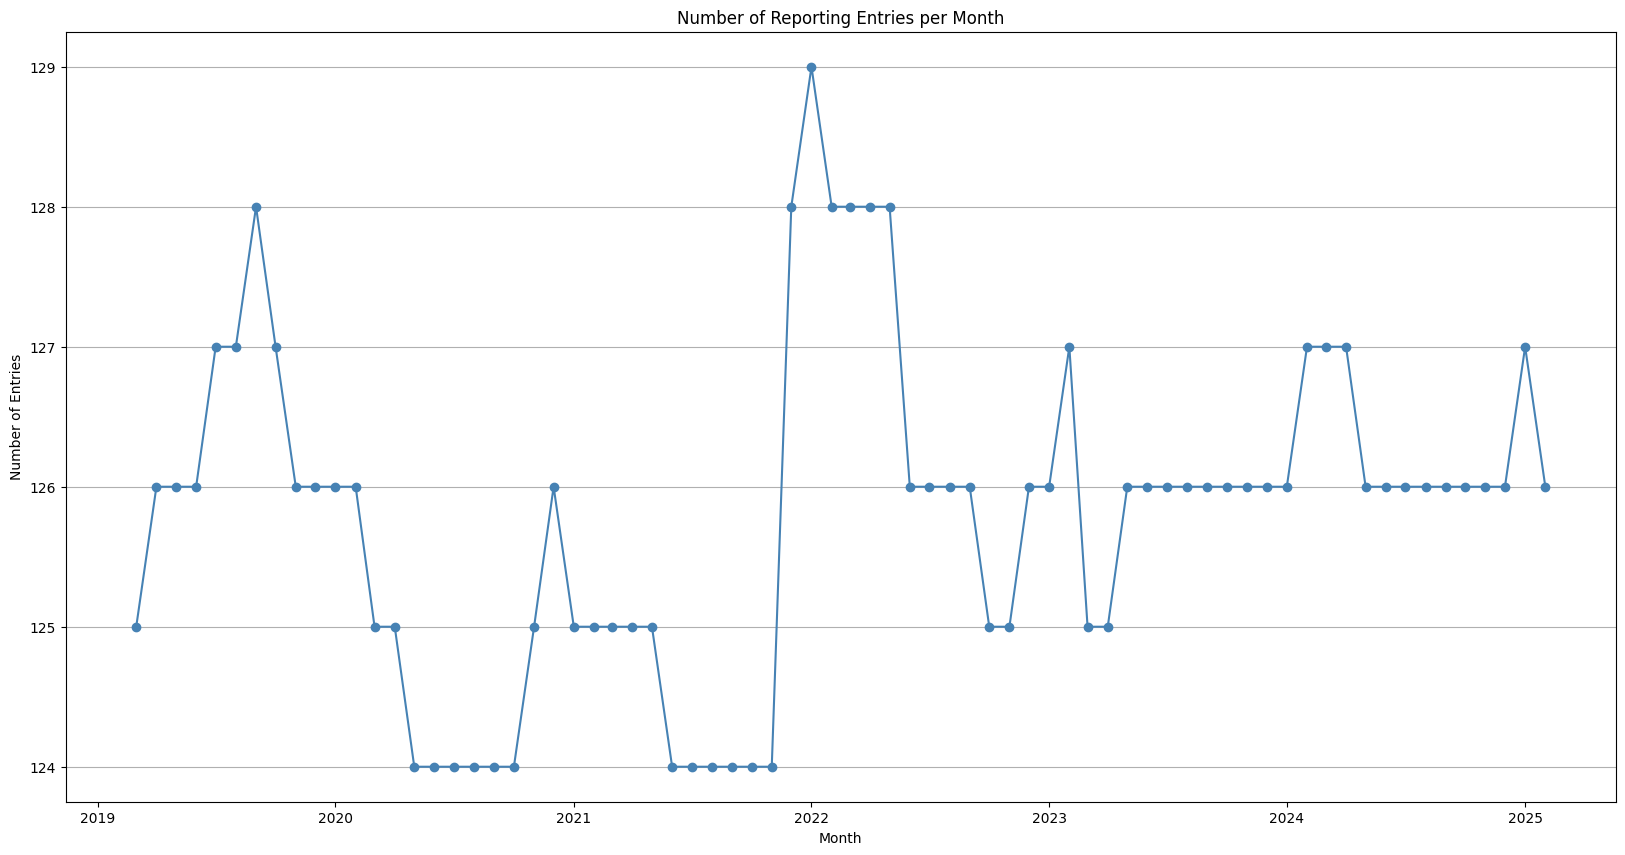

In [ ]:
# Plot monthly entry counts
monthly_counts = data['Period'].dt.to_period('M').value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()

plt.figure(figsize=(20, 10))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='steelblue')
plt.title("Number of Reporting Entries per Month")
plt.xlabel("Month")
plt.ylabel("Number of Entries")
plt.grid(True, axis='y')
plt.show()


The expected number of reports per month is roughly consistent, mostly around 124 to 129 entries, indicating a stable monthly reporting pattern.

Minor fluctuations (for example: 124 vs 129) are normal and may occur due to:

- Entry or exit of some banks in specific months.

- Late submission or structural changes in the banking sector.

## **Skewness + Histogram**

We check the skewness of numeric columns to examine the distribution shape of the dataset:

Skewness Analysis:


,Skew,Skew Type
Loans to general government,12.636489,Strongly Right-skewed
Acceptances,12.085253,Strongly Right-skewed
Net acceptances of customers,11.585077,Strongly Right-skewed
Loans to community service organisations,7.833755,Strongly Right-skewed
Deposits by general government,7.323969,Strongly Right-skewed
Trading securities,7.298966,Strongly Right-skewed
Deposits by community service organisations,6.992232,Strongly Right-skewed
Cash and deposits with financial institutions,6.687505,Strongly Right-skewed
Deposits by households,6.119036,Strongly Right-skewed
Investment securities,5.890265,Strongly Right-skewed


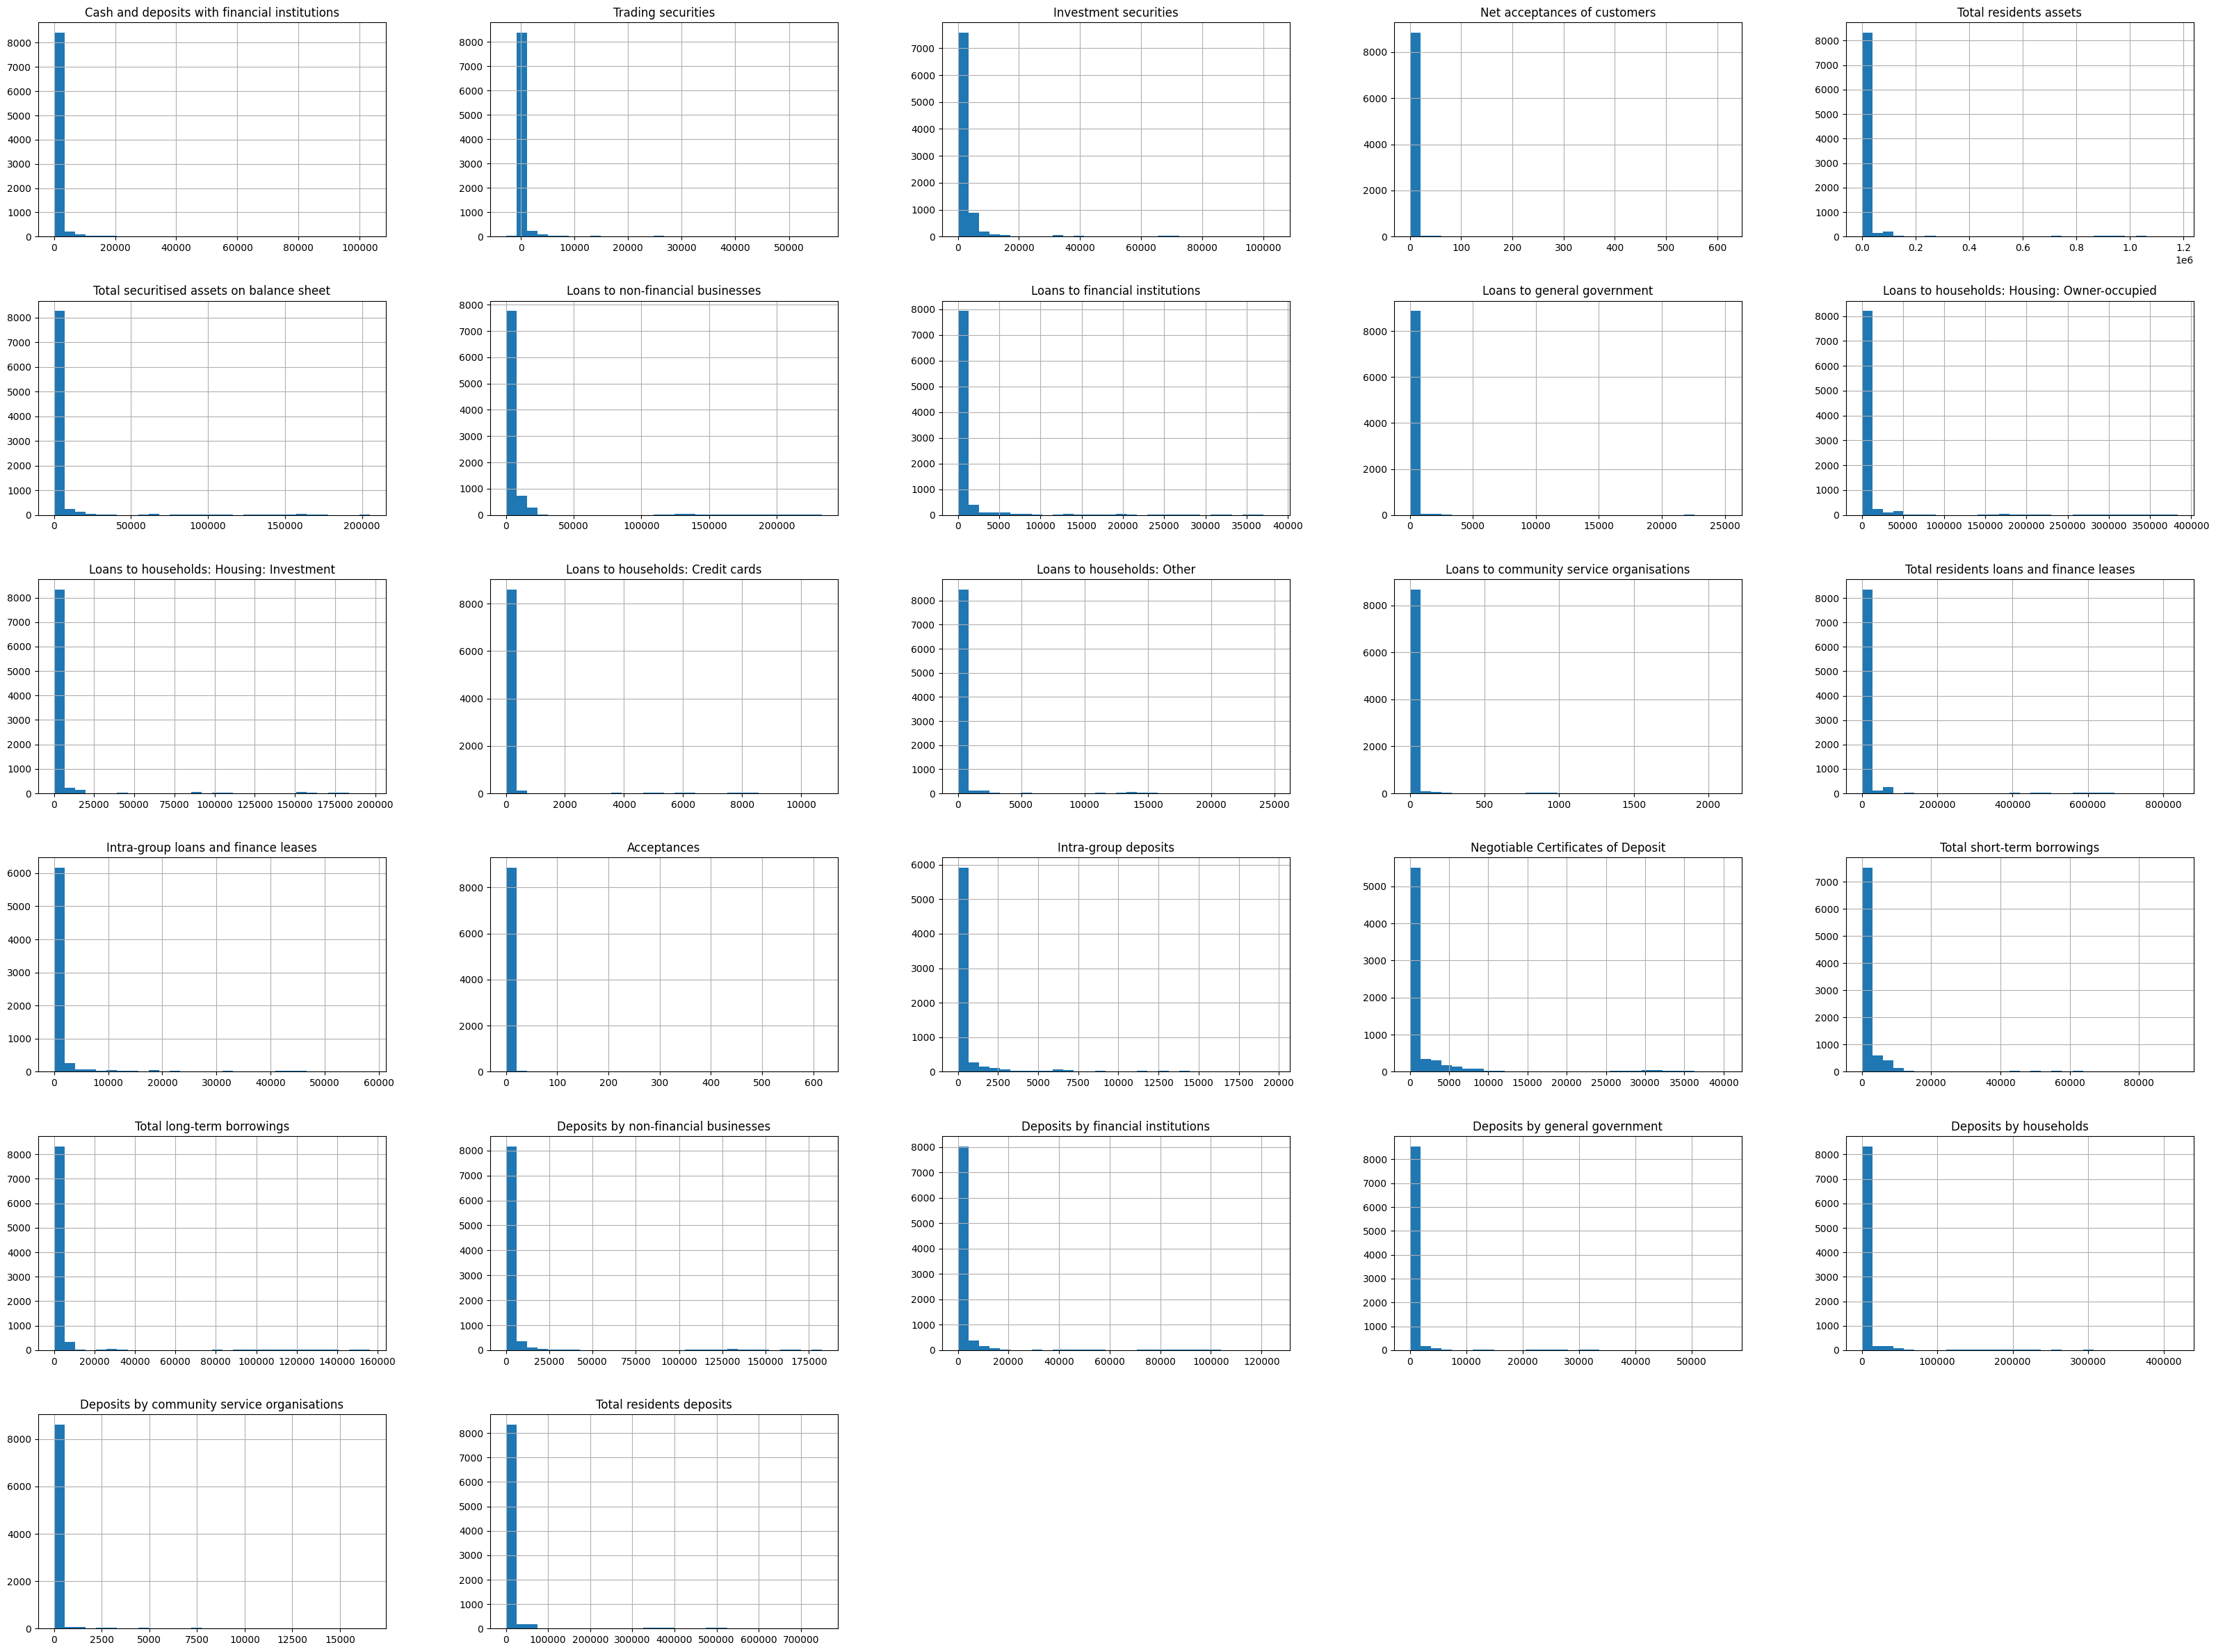

In [ ]:
# Analyze skewness and plot histogram
print("Skewness Analysis:")
skewness = financial_data.skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'Skew': skewness})

def classify_skew(val):
    if val > 1:
        return 'Strongly Right-skewed'
    elif val > 0.5:
        return 'Moderately Right-skewed'
    elif val > -0.5:
        return 'Symmetric'
    elif val > -1:
        return 'Moderately Left-skewed'
    else:
        return 'Strongly Left-skewed'

skew_df['Skew Type'] = skew_df['Skew'].apply(classify_skew)
display(skew_df)

print("\n")
financial_data.hist(bins=30, figsize=(40, 30))
plt.show()


Most columns are strongly right-skewed → some banks have very large values.

Example: `Loans to general government` (skew = 12.64).

This is normal in banking data because big banks hold much more than small ones.

## **Boxplot to Detect Outliers**

We use boxplots to detect outliers of the dataset:



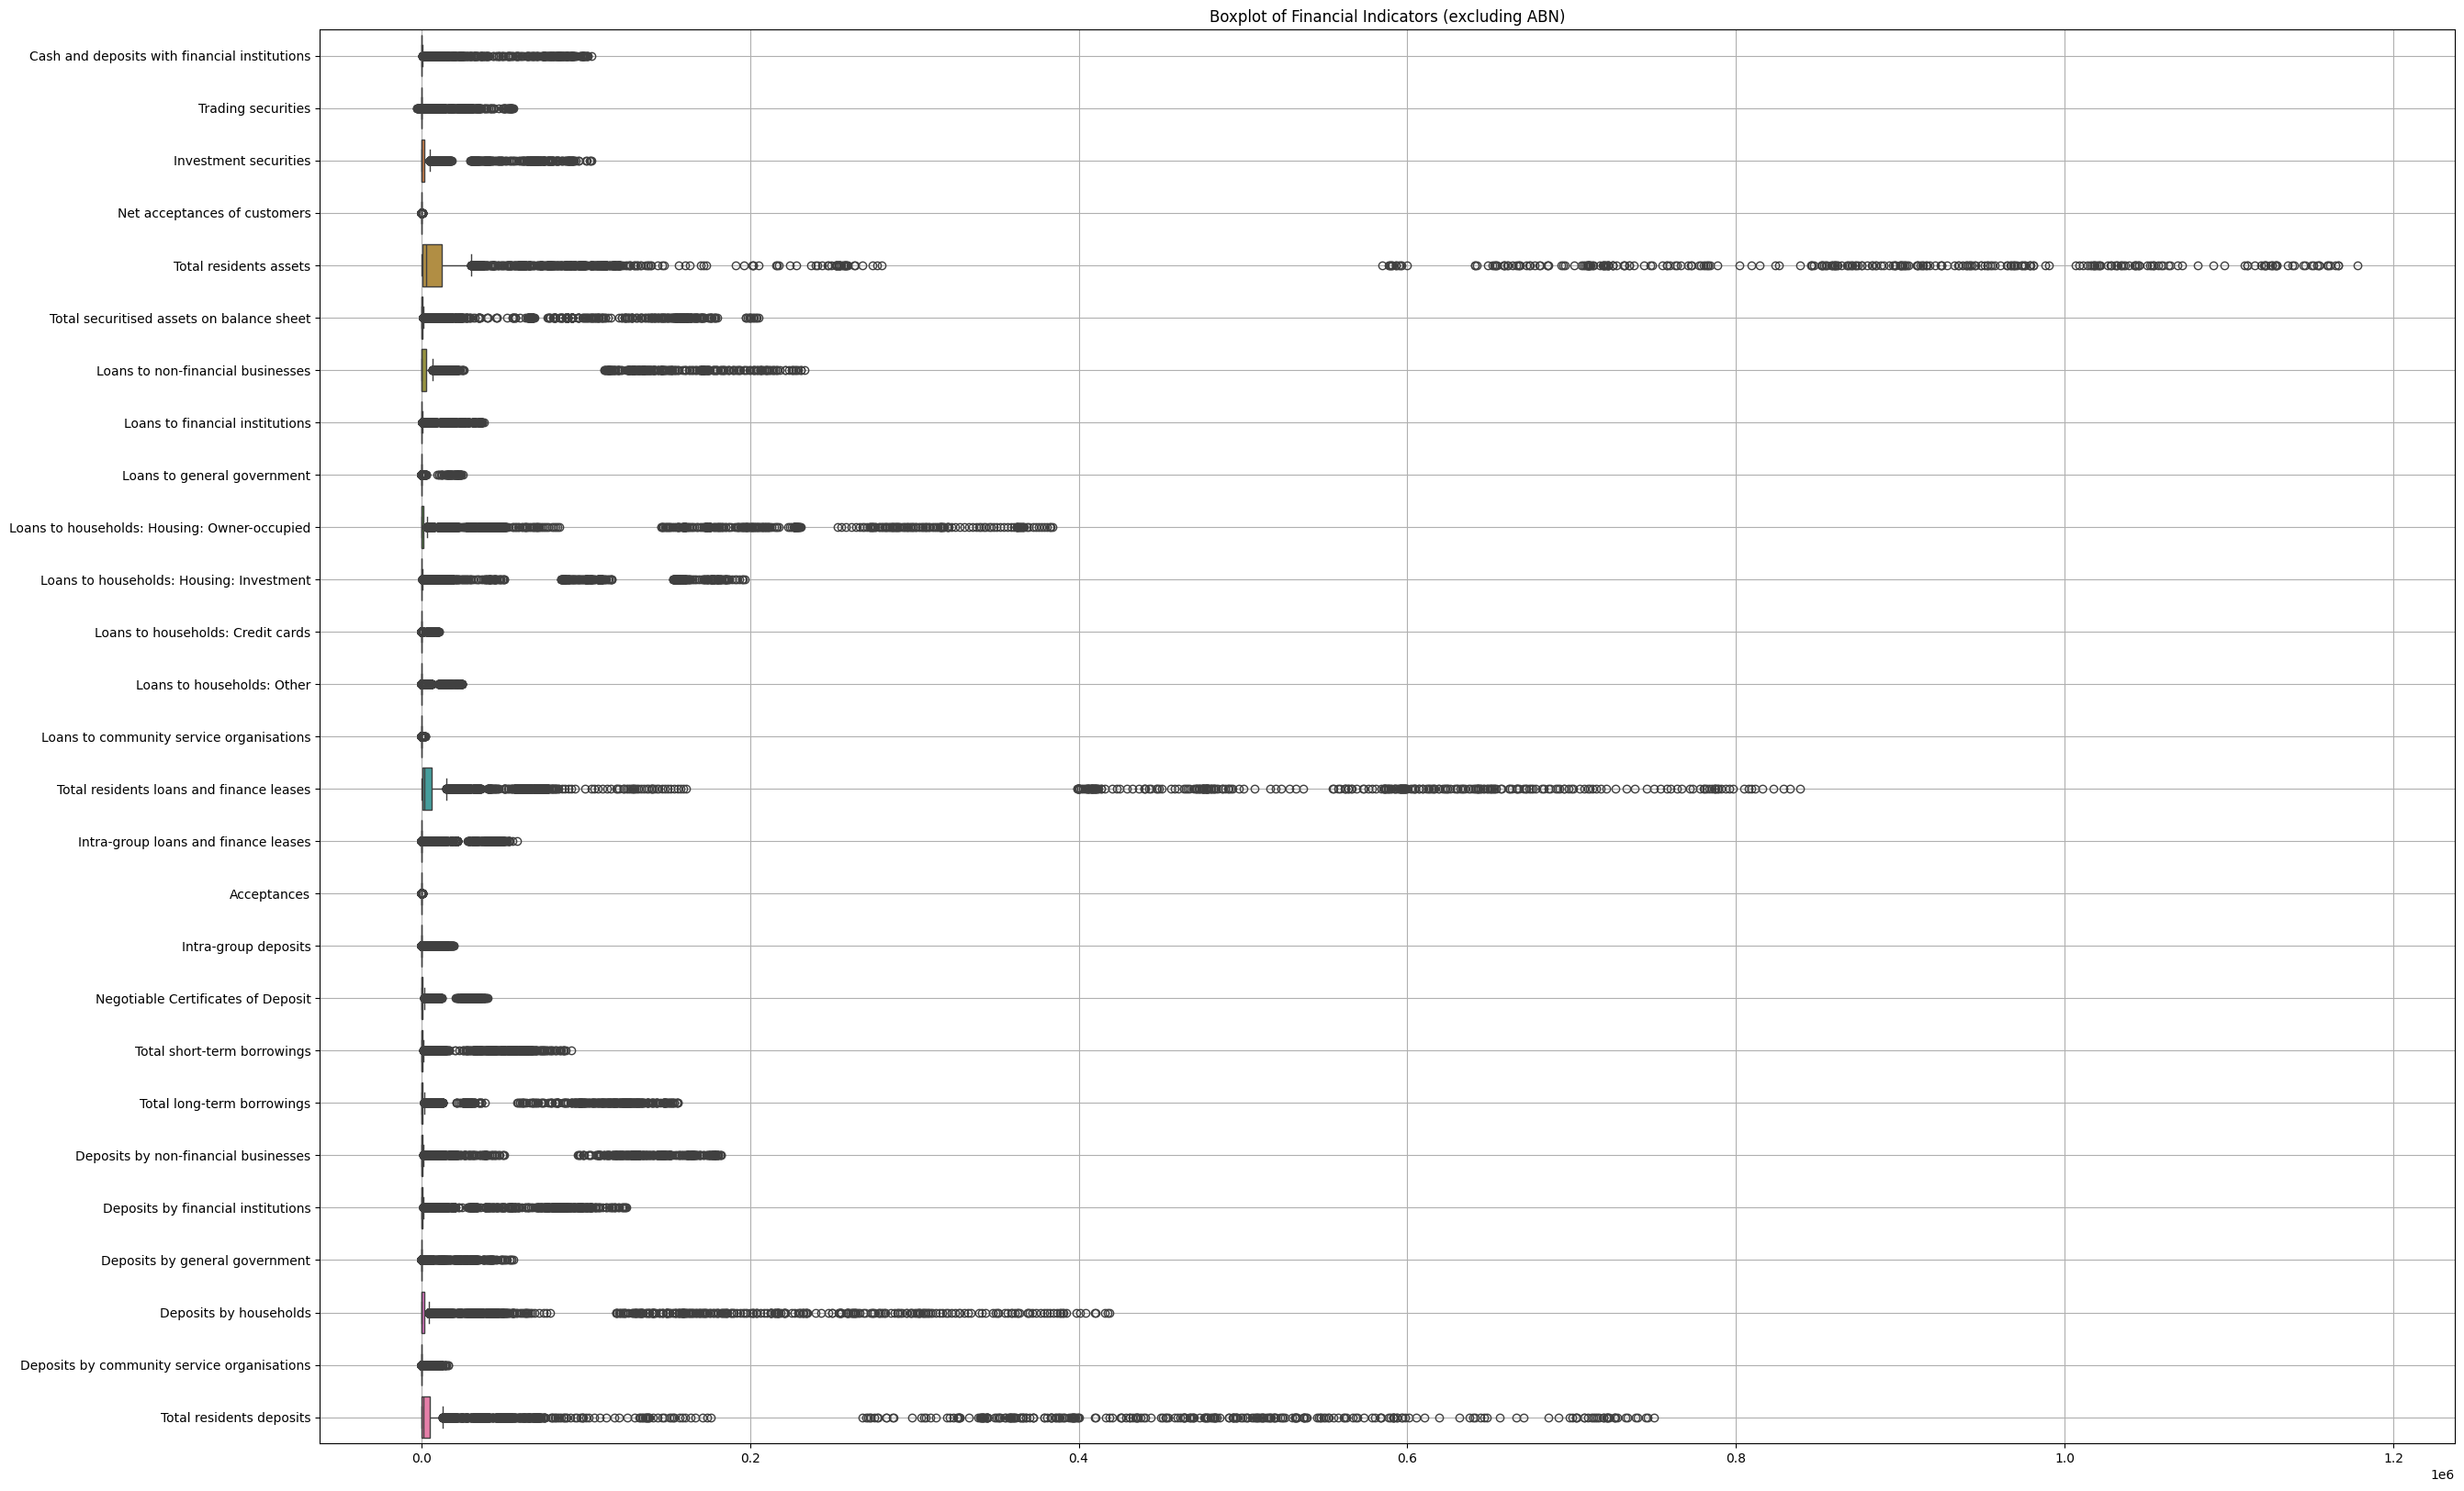

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(30, 20))
sns.boxplot(data=num_data.drop(['ABN'], axis=1), orient='h')
plt.title("Boxplot of Financial Indicators (excluding ABN)")
plt.grid(True)
plt.show()


This boxplot shows the distribution of each financial indicator, excluding ABN.

Many features (for example: `Total residents assets`, `Deposits by households`) have very long right tails and many dots far away from the box — these are outliers (very large values compared to most others).

These outliers are expected in Australia banking data, where some banks are much larger than others, especially Big 4 banks (CommonWealth, Westpac, ANZ and NBA), so the large values are not necessarily errors.

## **Missing Data Overview**

We check for missing values to examine the completeness of the dataset:

In [ ]:
# Check missing values
print("Missing Data Summary:")
missing_count = data.isnull().sum()
missing_percent = round(100 * missing_count / len(data), 2)

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})

display(missing_df[missing_df['Missing Count'] > 0])


Missing Data Summary:


,Missing Count,Missing %
Intra-group loans and finance leases,2071,22.86
Intra-group deposits,2071,22.86
Negotiable Certificates of Deposit,2071,22.86


Only 3 columns have missing values:

- `Intra-group loans and finance leases`

- `Intra-group deposits`

- `Negotiable Certificates of Deposit`

In [ ]:
# Check rows missing all 3 specific columns
missing_cols = [
    'Intra-group loans and finance leases',
    'Intra-group deposits',
    'Negotiable Certificates of Deposit'
]

missing_rows = data[missing_cols].isnull().all(axis=1)
print("Rows with all three columns missing:", missing_rows.sum(), "out of", data.shape[0], "rows.")


Rows with all three columns missing: 2071 out of 9058 rows.


All 3 are missing in the same 2071 rows (22.86%). This likely means these banks do not do intra-group transactions

→ Therefore, we treat these as meaningful absences, not data quality issues.

## **Zero Values**

We check for zero values to examine the validity of the dataset:

Zero Value Table:


,Zero Count,Zero %
Acceptances,8595,94.89
Net acceptances of customers,8582,94.74
Loans to general government,8070,89.09
Trading securities,7542,83.26
Loans to community service organisations,6811,75.19
Total securitised assets on balance sheet,5596,61.78
Loans to households: Credit cards,5569,61.48
Intra-group loans and finance leases,4784,52.82
Deposits by general government,4730,52.22
Intra-group deposits,4513,49.82


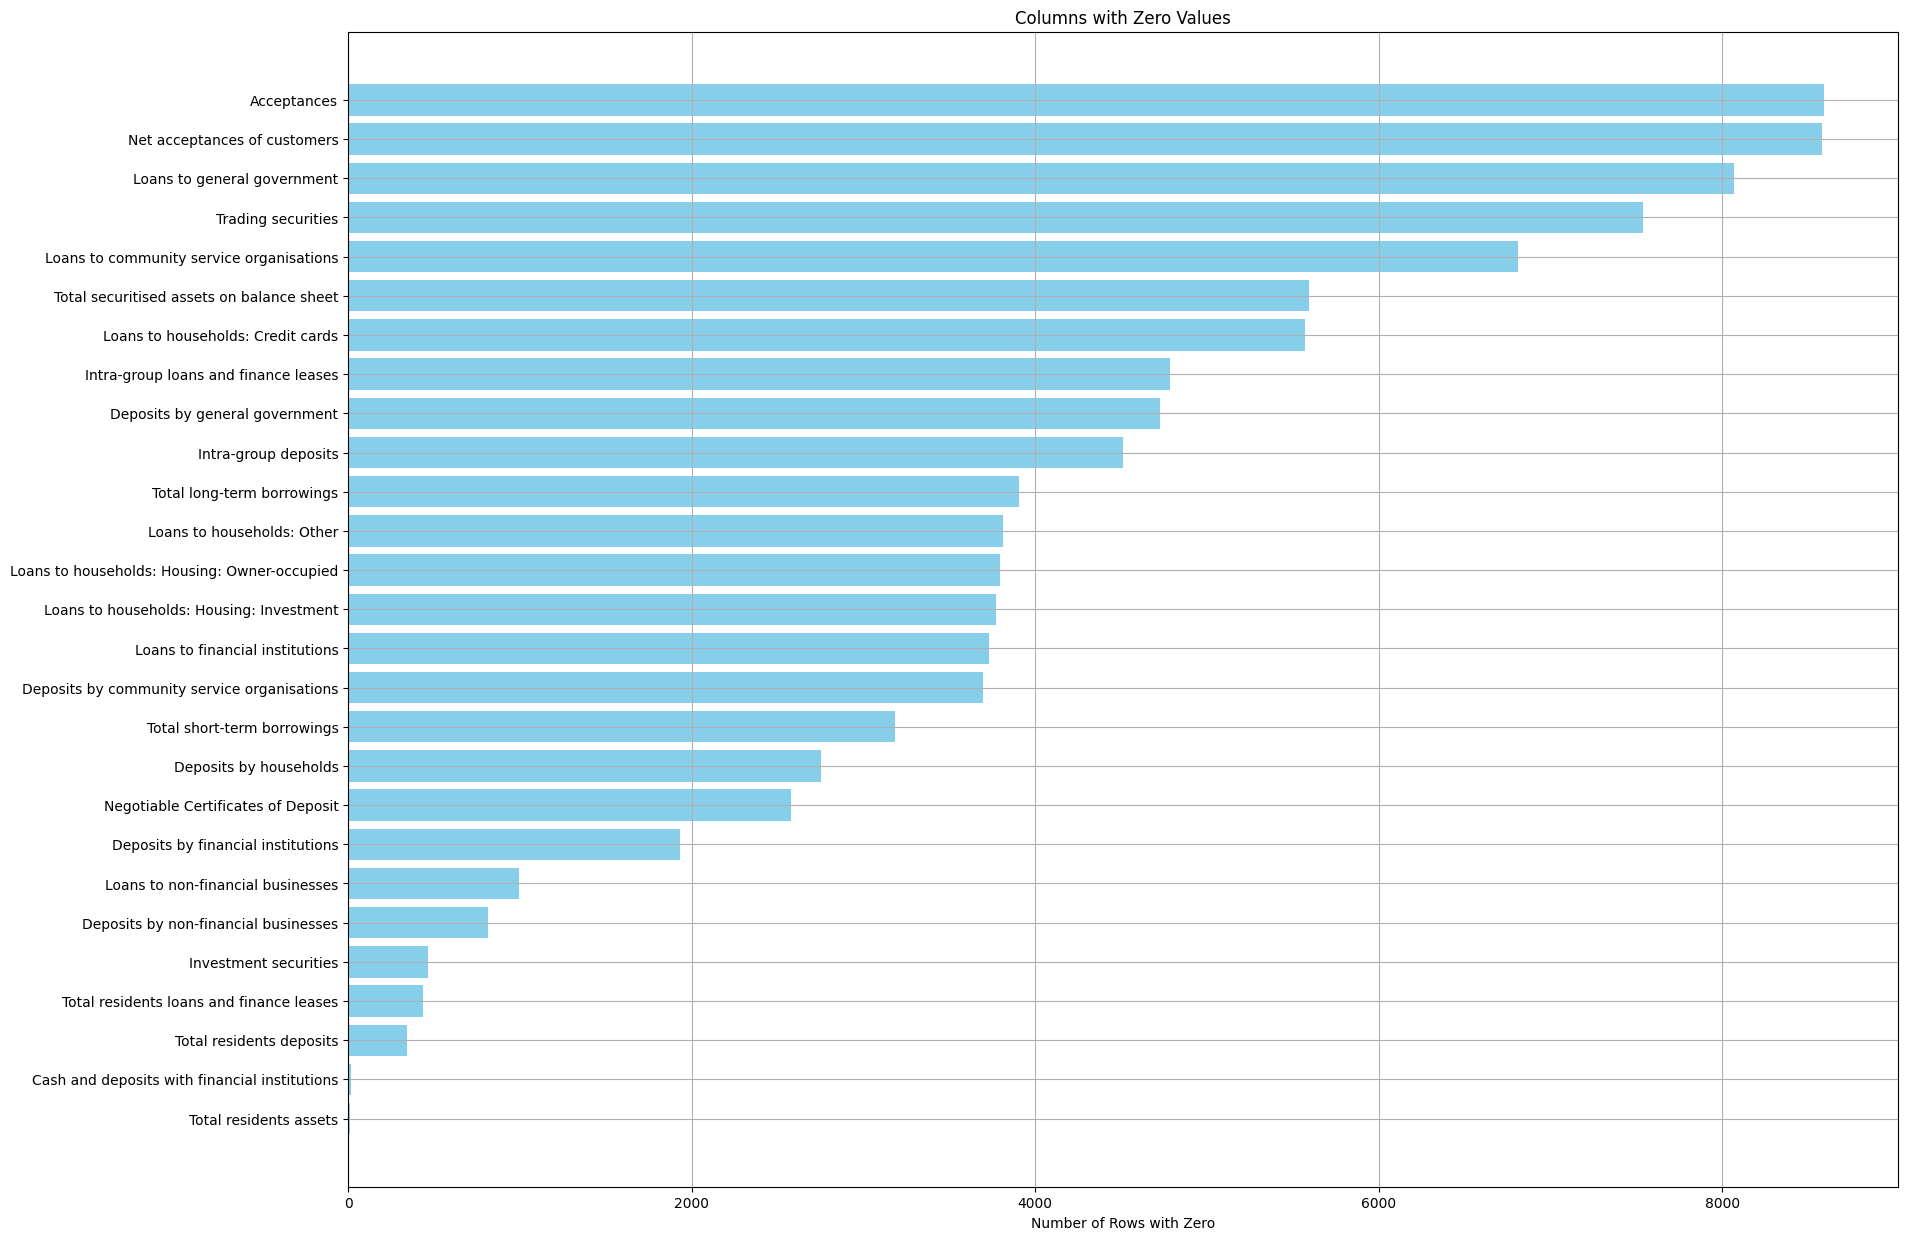

In [ ]:
# Check for zero values
zero_count = (data[numerical_cols] == 0).sum()
zero_percent = round(100 * zero_count / len(data), 2)

zero_df = pd.DataFrame({
    'Zero Count': zero_count,
    'Zero %': zero_percent
})

zero_df = zero_df[zero_df['Zero Count'] > 0].sort_values(by='Zero Count', ascending=False)

print("Zero Value Table:")
display(zero_df)

print("\n")

plt.figure(figsize=(20, 15))
plt.barh(zero_df.index, zero_df['Zero Count'], color='skyblue')
plt.title("Columns with Zero Values")
plt.xlabel("Number of Rows with Zero")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [ ]:
# Check rows with invalid total asset or borrowing values
zero_asset_rows = data[data['Total residents assets'] == 0]
print('Number of rows with Total residents assets = 0:', len(zero_asset_rows))

zero_borrowing_rows = data[
    (data['Total short-term borrowings'] + data['Total long-term borrowings']) == 0
]
print('Number of rows with total borrowings = 0:', len(zero_borrowing_rows))

all_zero_or_missing_rows = data[(financial_data.isna() | (financial_data == 0)).all(axis=1)]
print('Number of rows where all financial columns are zero or missing:', len(all_zero_or_missing_rows))

print('Banks with all-zero or missing financial rows:')
display(all_zero_or_missing_rows['Institution Name'].value_counts())


Number of rows with Total residents assets = 0: 13
Number of rows with total borrowings = 0: 2118
Number of rows where all financial columns are zero or missing: 12
Banks with all-zero or missing financial rows:


,count
Institution Name,
Barclays Bank PLC,4
Intesa Sanpaolo SPA,4
Credit Agricole Corporate and Investment Bank,2
Illawarra Credit Union Limited,1
Societe Generale,1


Over 20 columns have a high number of zeros. Top examples:

- `Acceptances`: 94.9%

- `Net acceptances of customers`: 94.7%

- `Trading securities`: 83.3%

Some key columns also have a few zero rows:

`Total residents assets`: 13 rows

- `Borrowings` (both short-term and long-term): 2,118 rows

12 rows have only zeros or missing values. We need to be careful when using these values in analysis.



## **Negative Values**

We check for negative values to examine the validity of the dataset:

In [ ]:
# Check for negative values
negative_count = (data[numerical_cols] < 0).sum()
negative_percent = round(100 * negative_count / len(data), 2)

negative_df = pd.DataFrame({
    'Negative Count': negative_count,
    'Negative %': negative_percent
})

negative_df = negative_df[negative_df['Negative Count'] > 0].sort_values(by='Negative Count', ascending=False)

print("\nNegative Value Table:")
display(negative_df)

print("\n")



Negative Value Table:


,Negative Count,Negative %
Trading securities,64,0.71


Only one column (`Trading securities`) has negative values, appearing in 64 rows (0.7%).

This could reflect revaluation losses or accounting adjustments in certain banks.

While rare, this anomaly is important to highlight since negative values are often unexpected in asset-type indicators.

## **Correlation Heatmap (Financial Columns)**

We create a correlation heatmap to examine the relationships between financial columns and assess the variable interdependence in the dataset:

Correlation Heatmap


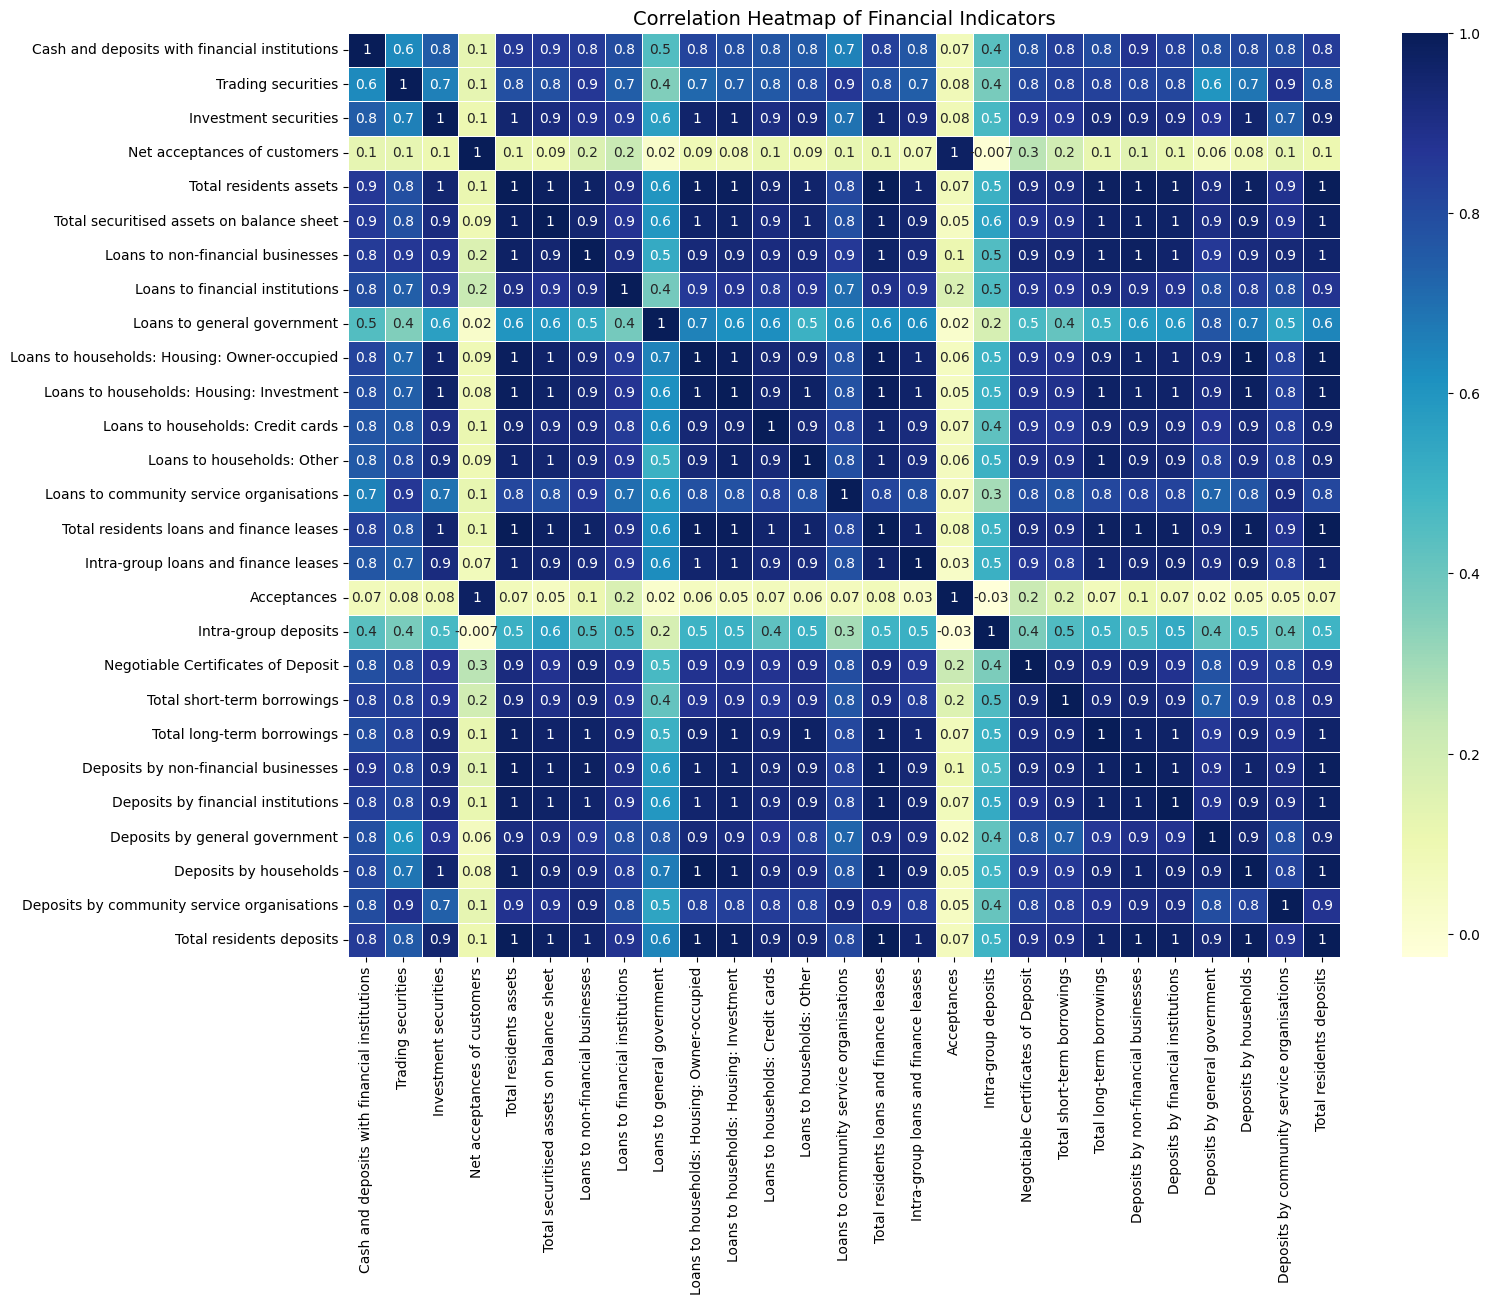

In [ ]:
# Correlation heatmap
print("Correlation Heatmap")

corr_matrix = num_data.drop(['ABN'], axis=1).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='YlGnBu', fmt='.1g')
plt.title("Correlation Heatmap of Financial Indicators", fontsize=14)
plt.show()



`Total residents deposits` have very strong correlation with:

- `Deposits by households` (correlation = 1.0)

- `Deposits by financial institutions` (0.99)

- `Deposits by non-financial businesses` (0.99)

`Total residents assets` are also strongly correlated with:

- `Total residents deposits` (0.99)

- `Total residents loans and finance leases` (0.99)

`Loans to households: Housing: Owner-occupied`, `Loans to households: Housing: Investment`, and `Loans to households: Other` all have correlations of 1.0 with each other. These loan types move together over time.

`Investment securities` show strong relationships with:

- `Trading securities` (0.91)

- `Cash and deposits with financial institutions` (0.87)

In contrast, `Acceptances` and `Net acceptances of customers` show weak or even negative correlations with most other indicators.



---



# **DATA PREPARATION**

## **Standardise Data Types (ABN)**

We change the `ABN` column from a number to a category:

In [ ]:
# Convert ABN from numerical to categorical
print("Converting ABN from numerical to categorical.")
data['ABN'] = data['ABN'].astype('category')


Converting ABN from numerical to categorical.


`ABN` is just a bank ID, not a number we need to calculate.

Changing it to category saves memory and makes analysis easier.

## **Create Time-Based Variables**

In [ ]:
# Create 'Financial_Year' column based on March–February fiscal year
print("Creating 'Financial_Year' column based on March–February fiscal year.")
print("\n")

def convert_fy(date):
    if date.month >= 3:
        return f"FY{date.year}"
    else:
        return f"FY{date.year - 1}"

data['Financial_Year'] = data['Period'].apply(convert_fy)
display(data[['Period', 'Financial_Year']].head(10))


Creating 'Financial_Year' column based on March–February fiscal year.




,Period,Financial_Year
0,2025-02-28,FY2024
1,2025-02-28,FY2024
2,2025-02-28,FY2024
3,2025-02-28,FY2024
4,2025-02-28,FY2024
5,2025-02-28,FY2024
6,2025-02-28,FY2024
7,2025-02-28,FY2024
8,2025-02-28,FY2024
9,2025-02-28,FY2024


We create `Financial_Year` column based on March–February cycle.

This range matches the dataset’s structure, which begins in March and ends in February, allowing consistent year-based grouping.

In [ ]:
# Create 'Period_Label' column for grouping by economic events
fy_to_period = {
    'FY2019': 'Stable',
    'FY2020': 'Crisis',
    'FY2021': 'Recovery',
    'FY2022': 'Rate Hikes',
    'FY2023': 'Pressure',
    'FY2024': 'Rebalancing'
}

data['Period_Label'] = data['Financial_Year'].map(fy_to_period)


In [ ]:
# Show distribution of periods
data['Period_Label'].value_counts()

,count
Period_Label,
Rate Hikes,1517
Stable,1516
Rebalancing,1515
Pressure,1511
Recovery,1504
Crisis,1495


Creating `Period_Label` column to classify economic periods. This column lets us group financial years into broader periods like “COVID Crisis” or “Rate Hike”, so we can compare asset structures by key events, not just by year.

## **Fix Bank Identity Conflicts**

In [ ]:
# Fix bank identity: merge multiple names under same ABN
abn_with_conflict = abn_conflict_df['ABN'].unique().tolist()

abn_to_names = (
    data.groupby('ABN', observed=False)['Institution Name']
    .unique()
    .apply(lambda names: ' / '.join(sorted(list(names))))
)

data['Institution Name'] = data['ABN'].map(abn_to_names)

print("List of ABNs with resolved Institution Names:")
display(
    data[data['ABN'].isin(duplicated_abn.index)][['ABN', 'Institution Name']]
    .drop_duplicates()
    .sort_values(['ABN', 'Institution Name'])
    .reset_index(drop=True)
)


List of ABNs with resolved Institution Names:


,ABN,Institution Name
0,11087651125,Australian Central Credit Union Ltd / Heritage...
1,13621804813,86 400 Ltd / 86400 Ltd
2,54087651750,Challenger Bank Limited / Heartland Bank Austr...
3,66010831722,Norfina Limited / Suncorp-Metway Limited
4,96087651992,Newcastle Greater Mutual Group Ltd / Newcastle...


We merge all associated names into one combined name using '/' and replaces them in the dataset.

## **Create Financial Ratios**

In [ ]:
# Create core financial ratios
data['Cash_to_Asset_Ratio'] = (
    data['Cash and deposits with financial institutions'] / data['Total residents assets'] * 100
)

data['Trading_Ratio'] = (
    data['Trading securities'] / data['Total residents assets'] * 100
)

data['Investment_Ratio'] = (
    data['Investment securities'] / data['Total residents assets'] * 100
)

data['Loan_to_Asset_Ratio'] = (
    data['Total residents loans and finance leases'] / data['Total residents assets'] * 100
)

data['Acceptance_Ratio'] = (
    data['Net acceptances of customers'] / data['Total residents assets'] * 100
)

data['Deposit_to_Asset_Ratio'] = (
    data['Total residents deposits'] / data['Total residents assets'] * 100
)

data['ShortTerm_Borrowing_Ratio'] = (
    data['Total short-term borrowings'] /
    (data['Total short-term borrowings'] + data['Total long-term borrowings']) * 100
)

data['Securitised_Asset_Ratio'] = (
    data['Total securitised assets on balance sheet'] / data['Total residents assets'] * 100
)


We create 8 core financial ratios to support the analysis in Part 5:

`Cash_to_Asset_Ratio`
→ Used in 5.2 (Asset Structure) and 5.3 (Liquidity Strategy):
Shows how much of the bank's assets are held in liquid form (cash or deposits).

`Trading_Ratio`
→ Used in 5.2 (Asset Structure):
Measures short-term investment allocation; indicates market exposure or trading activity.

`Investment_Ratio`
→ Used in 5.2 (Asset Structure) and 5.3 (Liquidity Strategy):
Captures long-term investment holdings in securities, reflecting stability-focused assets.

`Loan_to_Asset_Ratio`
→ Used in 5.2 (Asset Structure):
Represents lending intensity; a core earning asset in banking.

`Acceptance_Ratio`
→ Used in 5.2 (Asset Structure):
Measures the proportion of bank assets tied to customer acceptances (trade finance commitments).

`Deposit_to_Asset_Ratio`
→ Used in 5.3 (Liquidity Strategy):
Indicates reliance on deposits as a funding source; higher values suggest a retail funding strategy.

`ShortTerm_Borrowing_Ratio`
→ Used in 5.3 (Liquidity Strategy):
Shows dependency on short-term liabilities; relates to liquidity risk and refinancing needs.

`Securitised_Asset_Ratio`
→ Used in 5.3 (Liquidity Strategy):
Reflects the extent of asset securitisation; signals off-balance-sheet risk transfer strategy.

These ratios are simple and cover all key parts of a bank's balance sheet.

## **Handle Missing and Invalid Values**

We check for missing or invalid (infinite) values in the 8 ratios:

In [ ]:
# Handle missing and invalid values in financial ratios
ratio_columns = [
    'Cash_to_Asset_Ratio',
    'Trading_Ratio',
    'Investment_Ratio',
    'Loan_to_Asset_Ratio',
    'Acceptance_Ratio',
    'Deposit_to_Asset_Ratio',
    'ShortTerm_Borrowing_Ratio',
    'Securitised_Asset_Ratio'
]

print("Replacing infinite values in financial ratios with Null.")
data[ratio_columns] = data[ratio_columns].replace([np.inf, -np.inf], np.nan)

invalid_ratio_rows = data[ratio_columns].isna().all(axis=1)
print("\nNumber of rows with all financial ratios missing:", invalid_ratio_rows.sum())

all_zero_or_missing_rows = (financial_data == 0) | (financial_data.isna())
all_zero_or_missing_rows = all_zero_or_missing_rows.all(axis=1)
print("\nNumber of rows with all financial values zero or missing:", all_zero_or_missing_rows.sum())

overlap = invalid_ratio_rows & all_zero_or_missing_rows
print("\nNumber of rows both missing all ratios AND financial values:", overlap.sum())



Replacing infinite values in financial ratios with Null.

Number of rows with all financial ratios missing: 13

Number of rows with all financial values zero or missing: 12

Number of rows both missing all ratios AND financial values: 12


In [ ]:
# Check the only row with invalid ratio but some non-zero financial values
only_invalid_ratio_row = invalid_ratio_rows & (~all_zero_or_missing_rows)

print("One row is missing all ratios but still has some financial values → Checking if the failure is caused by zero assets or zero borrowings:")
print("\n")

display(
    data[only_invalid_ratio_row][[
        'Period', 'ABN', 'Institution Name',
        'Total residents assets',
        'Total short-term borrowings',
        'Total long-term borrowings'
    ]]
)


One row is missing all ratios but still has some financial values → Checking if the failure is caused by zero assets or zero borrowings:




,Period,ABN,Institution Name,Total residents assets,Total short-term borrowings,Total long-term borrowings
2899,2023-04-30,38616463855,Wise Australia Pty Ltd,0.0,0.0,0.0


In [ ]:
# Remove completely unusable rows
print("Remove rows with completely unusable data.")
data = data[~(all_zero_or_missing_rows | only_invalid_ratio_row)]


Remove rows with completely unusable data.


We find:

- 13 rows have all 8 ratios missing

- 12 of those rows also have all original values zero or missing

- 1 row has financial values, but assets and borrowings are both 0 → ratios cannot be calculated

→ We remove all 13 rows from the dataset.

## **Assign Hybrid Group Labels**

In [ ]:
# Assign hybrid group to banks based on average asset size and known Big Four list
big_four_names = [
    'commonwealth bank of australia',
    'westpac banking corporation',
    'australia and new zealand banking group limited',
    'national australia bank limited'
]

avg_asset = data.groupby('Institution Name', observed=False)['Total residents assets'].mean()
q1 = avg_asset.quantile(0.25)
q3 = avg_asset.quantile(0.75)

def assign_hybrid_group(row):
    bank = row['Institution Name']
    asset = avg_asset.get(bank, None)

    if bank.lower() in big_four_names:
        return 'Big Four'
    elif asset is None:
        return 'Unknown'
    elif asset < q1:
        return 'Small'
    elif asset > q3:
        return 'Large'
    else:
        return 'Medium'

data['Hybrid Group'] = data.apply(assign_hybrid_group, axis=1)

print('Hybrid Group distribution:')
display(
    data[['Institution Name', 'Hybrid Group']]
    .drop_duplicates()['Hybrid Group']
    .value_counts()
)

Hybrid Group distribution:


,count
Hybrid Group,
Medium,72
Small,36
Large,32
Big Four,4


We assign banks into 4 hybrid groups based on name and asset size:

- Big Four: Fixed list of systemically important banks

- Large: Non–Big Four banks with avg assets > Q3

- Medium: Between Q1 and Q3

- Small: Below Q1

→ This grouping supports analysis in next Section: Data Analysis



---



# **DATA ANALYSIS**

## **How has total bank assets changed over time?**

### **Total assets by financial year**

We first calculate the average monthly assets for each bank, then add them by year.

This gives a fairer view because some banks report more months than others.

In [ ]:
# Calculate average monthly asset per bank, then group by year
bank_avg_asset = (
    data.groupby(['Financial_Year', 'Institution Name'], observed=True)['Total residents assets']
    .mean()
    .reset_index()
)

asset_by_year = (
    bank_avg_asset
    .groupby('Financial_Year')['Total residents assets']
    .agg(['sum', 'mean'])
    .round(2)
    .reset_index()
)

asset_by_year.columns = ['Financial_Year', 'Total Assets (Sum)', 'Avg Asset per Bank']

print("Average total residents assets by year (sum and mean):")
display(asset_by_year)


Average total residents assets by year (sum and mean):


,Financial_Year,Total Assets (Sum),Avg Asset per Bank
0,FY2019,4103883.98,31568.34
1,FY2020,4547764.81,36093.37
2,FY2021,4785103.48,37093.83
3,FY2022,5263164.52,40176.83
4,FY2023,5349865.58,42124.93
5,FY2024,5370360.05,41955.94


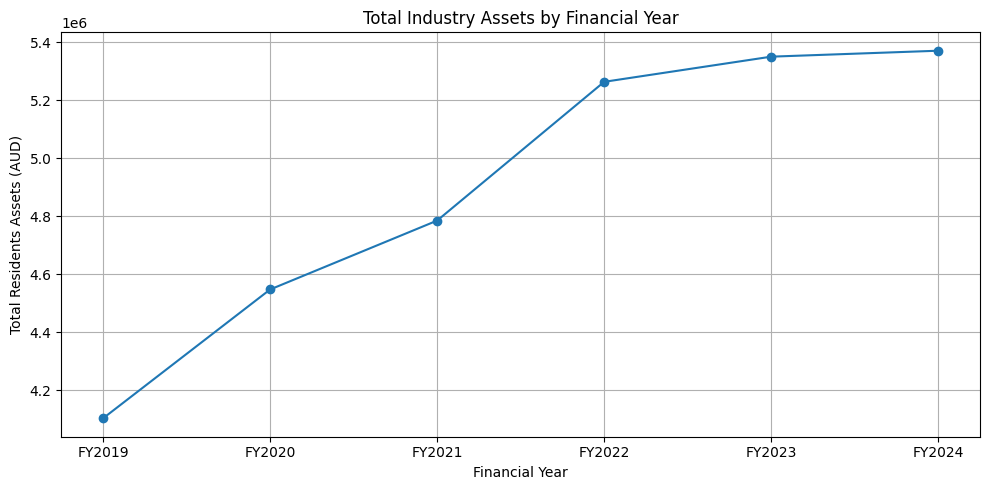

In [ ]:
# Line chart – Total industry assets by year
plt.figure(figsize=(10, 5))
plt.plot(asset_by_year['Financial_Year'], asset_by_year['Total Assets (Sum)'], marker='o')
plt.title('Total Industry Assets by Financial Year')
plt.xlabel('Financial Year')
plt.ylabel('Total Residents Assets (AUD)')
plt.grid(True)
plt.tight_layout()
plt.show()


Observations – Total Assets:

- Total assets increased every year from FY2019 to FY2024.

- The biggest jumps happened between FY2019 to FY2020 and FY2021 to FY2022.

- From FY2023 to FY2024, the growth slowed down and stayed almost the same.



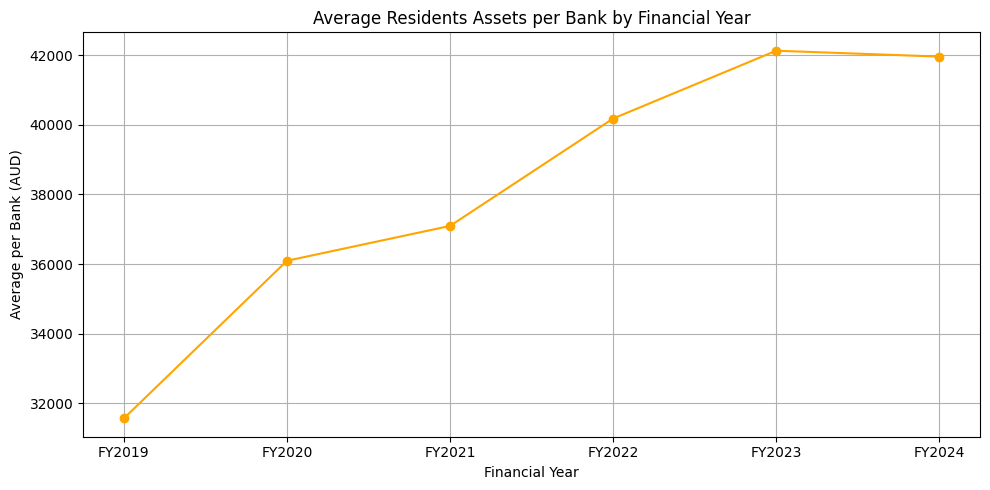

In [ ]:
# Line chart – Average assets per bank by year
plt.figure(figsize=(10, 5))
plt.plot(
    asset_by_year['Financial_Year'],
    asset_by_year['Avg Asset per Bank'],
    marker='o',
    color='orange'
)
plt.title('Average Residents Assets per Bank by Financial Year')
plt.xlabel('Financial Year')
plt.ylabel('Average per Bank (AUD)')
plt.grid(True)
plt.tight_layout()
plt.show()


Observations – Average Assets per Bank:

- The average total assets per bank also increased steadily from FY2019 to FY2024.

- The sharpest growth happened between FY2019 to FY2020 and FY2021 to FY2022, similar to the industry trend.

- After FY2022, the average stayed almost the same, showing that growth slowed down for individual banks.


Conclusion:

- The banking industry grew every year from FY2019 to FY2024. Growth was strongest in FY2020 and FY2022.

- After FY2022, both total assets and average per bank became stable, meaning banks grew slower than before.

### **Calculate YoY growth and CAGR**

We calculate CAGR and YoY for total assets and average asset per bank:

In [ ]:
# Calculate CAGR (Compound Annual Growth Rate)
start_year = 'FY2019'
end_year = 'FY2024'
n_years = 5

start_value_total = asset_by_year[asset_by_year['Financial_Year'] == start_year]['Total Assets (Sum)'].reset_index(drop=True)
end_value_total = asset_by_year[asset_by_year['Financial_Year'] == end_year]['Total Assets (Sum)'].reset_index(drop=True)

cagr_total = ((end_value_total[0] / start_value_total[0]) ** (1 / n_years) - 1) * 100

start_value_avg = asset_by_year[asset_by_year['Financial_Year'] == start_year]['Avg Asset per Bank'].reset_index(drop=True)
end_value_avg = asset_by_year[asset_by_year['Financial_Year'] == end_year]['Avg Asset per Bank'].reset_index(drop=True)

cagr_avg = ((end_value_avg[0] / start_value_avg[0]) ** (1 / n_years) - 1) * 100

print("CAGR (Total Industry Assets):", round(cagr_total, 2), "%")
print("CAGR (Avg Asset per Bank):", round(cagr_avg, 2), "%")


CAGR (Total Industry Assets): 5.53 %
CAGR (Avg Asset per Bank): 5.85 %


CAGR for total industry assets: 5.53%.

CAGR for average asset per bank: 5.85%.

The similar CAGR values show that industry growth was consistent both in total and per-bank terms.

YoY Growth (%) of Total Industry Assets:


,Financial_Year,YoY Growth (Total)
0,FY2019,0.00
1,FY2020,10.82
2,FY2021,5.22
3,FY2022,9.99
4,FY2023,1.65
5,FY2024,0.38


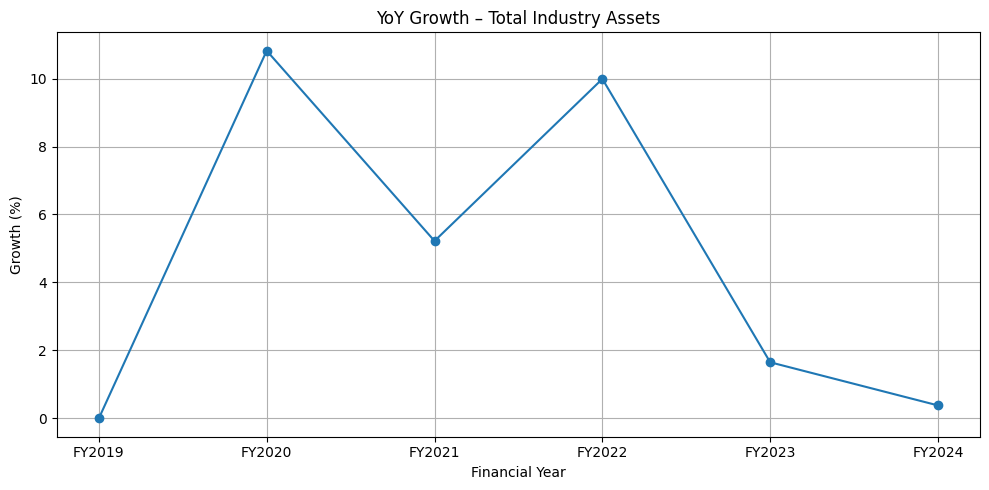

In [ ]:
# Calculate YoY Growth (Total Assets)
asset_by_year['YoY Growth (Total)'] = (
    asset_by_year['Total Assets (Sum)']
    .pct_change()
    .fillna(0)
    .round(4) * 100
)

print("YoY Growth (%) of Total Industry Assets:")
display(asset_by_year[['Financial_Year', 'YoY Growth (Total)']])

plt.figure(figsize=(10, 5))
plt.plot(
    asset_by_year['Financial_Year'],
    asset_by_year['YoY Growth (Total)'],
    marker='o'
)
plt.title('YoY Growth – Total Industry Assets')
plt.xlabel('Financial Year')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


Observations – YoY Growth (Total Industry Assets):

- The total industry assets grew steadily from FY2019 to FY2022.

- FY2020 saw the strongest growth, with a 10.8% increase.

- Growth slowed down in FY2021 and FY2023, and dropped to almost zero in FY2024.

YoY Growth (%) of Average Asset per Bank:


,Financial_Year,YoY Growth (Avg per Bank)
0,FY2019,0.00
1,FY2020,14.33
2,FY2021,2.77
3,FY2022,8.31
4,FY2023,4.85
5,FY2024,-0.40


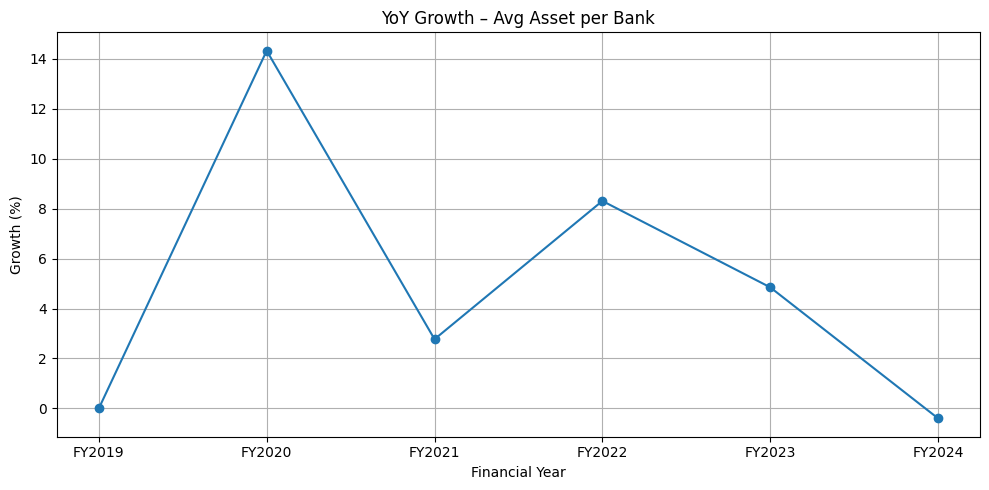

In [ ]:
# Calculate YoY Growth (Average Asset per Bank)
asset_by_year['YoY Growth (Avg per Bank)'] = (
    asset_by_year['Avg Asset per Bank']
    .pct_change()
    .fillna(0)
    .round(4) * 100
)

print("YoY Growth (%) of Average Asset per Bank:")
display(asset_by_year[['Financial_Year', 'YoY Growth (Avg per Bank)']])

plt.figure(figsize=(10, 5))
plt.plot(
    asset_by_year['Financial_Year'],
    asset_by_year['YoY Growth (Avg per Bank)'],
    marker='o'
)
plt.title('YoY Growth – Avg Asset per Bank')
plt.xlabel('Financial Year')
plt.ylabel('Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


Observations – YoY Growth (Avg Asset per Bank):

- The average asset per bank also jumped in FY2020, rising by over 14%.

- In FY2021 and FY2022, the growth continued but at a slower pace.

- In FY2023, growth dropped again, and FY2024 showed negative growth.

Conclusion:

- The banking sector grew strongly in FY2020 but slowed down after that.

- By FY2024, total asset growth had nearly stopped, and average bank size even declined.

- From FY2019 to FY2024, the average growth rate (CAGR) was around 5.5% for total assets and 5.8% for average per bank, showing moderate long-term growth.

### **Compare growth across bank groups (Hybrid Group)**

In [ ]:
# Merge Hybrid Group information
hybrid_map = data[['Institution Name', 'Hybrid Group']].drop_duplicates()

bank_avg_asset = bank_avg_asset.merge(
    hybrid_map,
    on='Institution Name',
    how='left'
)

In [ ]:
# Group and display total asset by hybrid group
group_asset_by_year = (bank_avg_asset
    .groupby(['Financial_Year', 'Hybrid Group'], observed=False)['Total residents assets']
    .sum()
    .round(2)
    .reset_index()
    .rename(columns={'Total residents assets': 'Group Total Asset'})
)

industry_total_by_year = (
    asset_by_year[['Financial_Year', 'Total Assets (Sum)']]
    .rename(columns={'Financial Year': 'Financial_Year','Total Assets (Sum)': 'Industry Total'})
)

group_asset_by_year = group_asset_by_year.merge(industry_total_by_year, on='Financial_Year', how='left')
group_asset_by_year['Share (%)'] = (group_asset_by_year['Group Total Asset'] / group_asset_by_year['Industry Total'] * 100).round(2)

group_asset_by_year['YoY Growth (%)'] = (
    group_asset_by_year
    .sort_values(['Hybrid Group', 'Financial_Year'])
    .groupby('Hybrid Group')['Group Total Asset']
    .pct_change()
    .fillna(0).round(4) * 100
)

pivot_group_asset_by_year = group_asset_by_year.pivot(
    index='Financial_Year',
    columns='Hybrid Group',
    values=['Group Total Asset', 'Share (%)', 'YoY Growth (%)']
)

print("Asset growth and contribution per group:")
display(pivot_group_asset_by_year)

Asset growth and contribution per group:


Group Total Asset                                  Share (%)  \
Hybrid Group            Big Four       Large     Medium     Small  Big Four   
Financial_Year                                                                
FY2019                3030286.95   890980.76  175580.67   7035.60     73.84   
FY2020                3317185.22  1010629.98  211315.78   8633.83     72.94   
FY2021                3445526.49  1094914.25  235360.58   9302.16     72.01   
FY2022                3769950.83  1219004.68  264826.87   9382.14     71.63   
FY2023                3827958.58  1245610.78  266693.82   9602.41     71.55   
FY2024                3780705.13  1294533.57  282087.78  13033.57     70.40   

                                   YoY Growth (%)                       
Hybrid Group    Large Medium Small       Big Four  Large Medium  Small  
Financial_Year                                                          
FY2019          21.71   4.28  0.17           0.00   0.00   0.00   0.00  
FY2020          22.22   4.65  0.19           9.47  13.43  20.35  22.72  
FY2021          22.88   4.92  0.19           3.87   8.34  11.38   7.74  
FY2022          23.16   5.03  0.18           9.42  11.33  12.52   0.86  
FY2023          23.28   4.99  0.18           1.54   2.18   0.70   2.35  
FY2024          24.11   5.25  0.24          -1.23   3.93   5.77  35.73

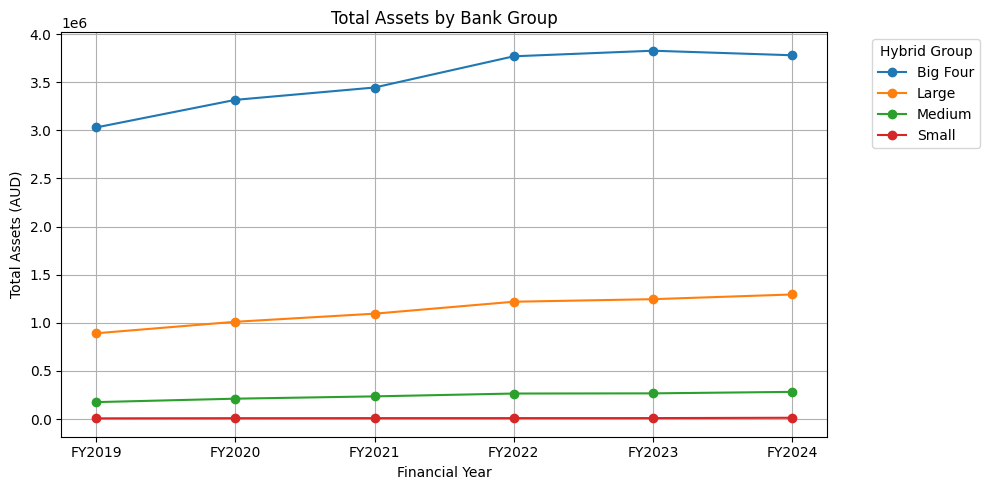

In [ ]:
# Plot group total assets by year
pivot_group_asset_by_year['Group Total Asset'].plot(marker='o', figsize=(10, 5))
plt.title('Total Assets by Bank Group')
plt.xlabel('Financial Year')
plt.ylabel('Total Assets (AUD)')
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


Observation – Total Assets by Bank Group:

- The Big Four banks held the most assets and grew steadily until FY2023, then slightly declined in FY2024.

- Large banks showed stable growth, while Medium and Small groups had much smaller asset volumes.

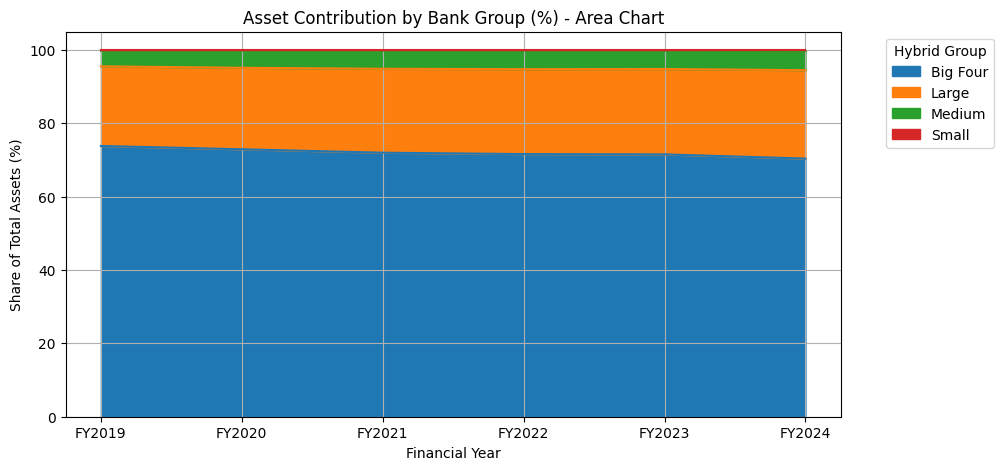

In [ ]:
# Area chart: Asset share by group
pivot_group_asset_by_year['Share (%)'].plot.area(figsize=(10, 5), stacked=True)
plt.title('Asset Contribution by Bank Group (%) - Area Chart')
plt.xlabel('Financial Year')
plt.ylabel('Share of Total Assets (%)')
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



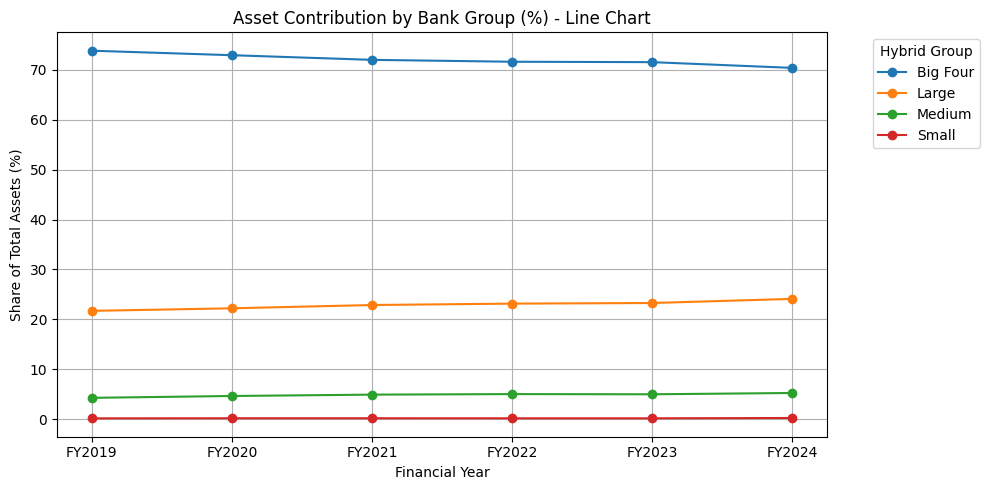

In [ ]:
# Line chart: Asset share by group
pivot_group_asset_by_year['Share (%)'].plot(marker='o', figsize=(10, 5))
plt.title('Asset Contribution by Bank Group (%) - Line Chart')
plt.xlabel('Financial Year')
plt.ylabel('Share of Total Assets (%)')
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Observation – Asset Contribution by Bank Group (%) with Area Chart & Line Chart:

- The area chart shows total share together, while the line chart makes it easier to see each group's trend.

- Big Four banks had the biggest share of total assets in all years. However, their share went down slowly from FY2019 to FY2024.

- At the same time, Large and Medium banks got a bit more share.

- Small banks stayed about the same and had very small impact.

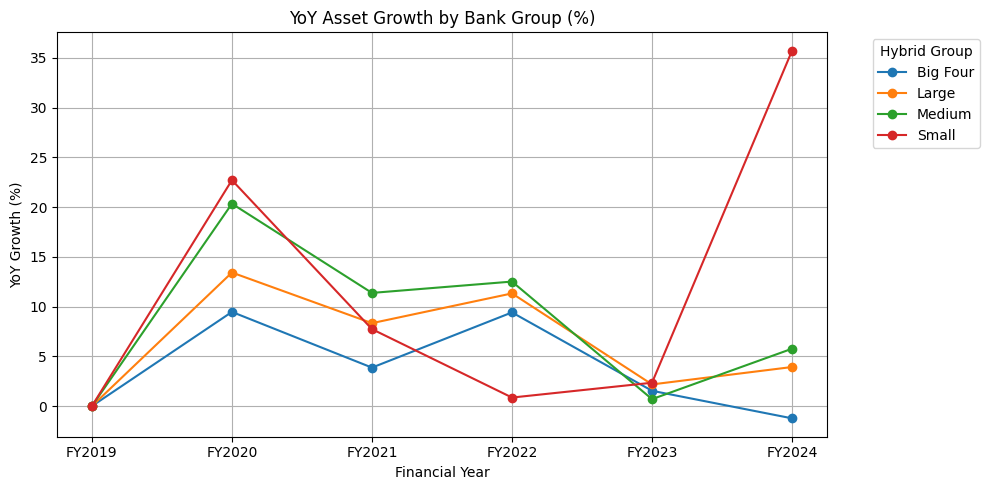

In [ ]:
# Line chart: YoY Growth by group
pivot_group_asset_by_year['YoY Growth (%)'].plot(marker='o', figsize=(10, 5))
plt.title('YoY Asset Growth by Bank Group (%)')
plt.xlabel('Financial Year')
plt.ylabel('YoY Growth (%)')
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Observation – YoY Asset Growth by Bank Group (%):

- All groups grew strongly in FY2020.

- Growth rates dropped after that, especially for Big Four.

- In FY2024, Small banks had a sudden spike, while others grew slowly or even shrank.

Conclusion:

- From FY2019 to FY2024, total assets increased across all bank groups, but Big Four banks still held the most assets every year.

- However, the share of total assets from Big Four banks slowly went down. Meanwhile, Large and Medium banks increased their share slightly. Small banks remained very small in both size and contribution.

- In FY2024, the Small group had a big YoY growth, but the impact was limited due to its small base.

- Overall, the industry is still led by Big Four banks, but other groups are gaining some ground.

### **ANSWER FOR QUESTION: How has total bank assets changed over time?**

From FY2019 to FY2024, total bank assets in Australia increased every year, but the pace of growth changed across different economic periods.

In FY2020, during the COVID-19 crisis, the Reserve Bank of Australia (RBA) cut interest rates to record lows. This helped banks grow their cash holdings and receive large deposit inflows. As a result, asset growth was strong even during the recession. FY2020 showed the fastest increase in both total assets and average assets per bank.

In FY2021 and FY2022, the recovery phase continued. The economy improved, interest rates stayed low, and people and businesses started borrowing and spending again. These conditions supported high asset growth for banks across all sizes. Hence, this period also showed rapid increase in both total assets and average assets per bank.

Starting from FY2023, the RBA raised interest rates to control inflation. Higher rates led to slower loan demand and tighter funding conditions. In FY2024, total assets still grew slightly, but growth almost stopped, and the average asset per bank even declined.

Looking across all years, the Compound Annual Growth Rate (CAGR) was about 5.5% for total assets and 5.8% for average assets per bank, showing moderate long-term growth.

In terms of bank groups, Big Four banks held most of the assets every year. However, their share slowly declined, while Large and Medium banks increased their share slightly. In FY2024, Small banks had strong YoY growth, but their total size was still very small, so the impact was limited.

## **How did the asset structure change in different periods?**

### **Special Case Analysis: Trading and Acceptances Ratio**

According to banking theory (based on Rose & Hudgins, *Bank Management and Financial Services*, 10th Edition), a bank’s asset structure is generally divided into five key components, each linked to a specific financial strategy:

1. Cash and deposits → Liquidity and safety  

2. Loans and advances → Core lending activity  

3. Investment securities → Long-term stability and income  

4. Trading securities → Short-term market activity and speculation  

5. Customer acceptances → Trade finance support

When applying this framework to the APRA dataset (2019–2025), we found:

- `Trading securities` are zero in over 83% of rows, with some negative values.

- `Net acceptances of customers` are zero in over 94% of rows.

Therefore, I kept only the three most representative and reliable ratios:
`Cash_to_Asset_Ratio`, `Loan_to_Asset_Ratio`, and `Investment_Ratio`. The `Trading_Ratio` and `Acceptance_Ratio` will be examined in this section to determine whether and how they should be used in the later analysis.

In [ ]:
# Create helper flags for Trading Ratio and Acceptance Ratio
data['Trading_Ratio_NonZero'] = data['Trading_Ratio'] != 0
data['Trading_Ratio_Negative'] = data['Trading_Ratio'] < 0
data['Acceptance_Ratio_NonZero'] = data['Acceptance_Ratio'] != 0


# Count total rows per group
total_counts = (
    data
    .groupby(['Financial_Year', 'Hybrid Group'])
    .size()
    .reset_index(name='Total_Rows')
)

# Count non-zero and negative ratios
zero_negative_data = (
    data
    .groupby(['Financial_Year', 'Hybrid Group'])
    .agg(
        Trading_Ratio_NonZero_Count=('Trading_Ratio_NonZero', 'sum'),
        Trading_Ratio_Negative_Count=('Trading_Ratio_Negative', 'sum'),
        Acceptance_Ratio_NonZero_Count=('Acceptance_Ratio_NonZero', 'sum')
    )
    .reset_index()
)

zero_negative_data = zero_negative_data.merge(
    total_counts,
    on=['Financial_Year', 'Hybrid Group']
)

# Calculate percentages
zero_negative_data['Trading_Ratio_NonZero_%'] = (
    zero_negative_data['Trading_Ratio_NonZero_Count'] / zero_negative_data['Total_Rows'] * 100
).round(2)

zero_negative_data['Trading_Ratio_Negative_%'] = (
    zero_negative_data['Trading_Ratio_Negative_Count'] / zero_negative_data['Total_Rows'] * 100
).round(2)

zero_negative_data['Acceptance_Ratio_NonZero_%'] = (
    zero_negative_data['Acceptance_Ratio_NonZero_Count'] / zero_negative_data['Total_Rows'] * 100
).round(2)


# Select final columns and display
zero_negative_data = zero_negative_data[[
    'Financial_Year', 'Hybrid Group', 'Total_Rows',
    'Trading_Ratio_NonZero_Count', 'Trading_Ratio_NonZero_%',
    'Trading_Ratio_Negative_Count', 'Trading_Ratio_Negative_%',
    'Acceptance_Ratio_NonZero_Count', 'Acceptance_Ratio_NonZero_%'
]]

pivot_zero_negative_data = zero_negative_data.pivot(
    index='Financial_Year',
    columns='Hybrid Group',
    values=[
        'Trading_Ratio_NonZero_%',
        'Trading_Ratio_Negative_%',
        'Acceptance_Ratio_NonZero_%'
    ]
)

display(pivot_zero_negative_data)

Trading_Ratio_NonZero_%                      \
Hybrid Group                  Big Four  Large Medium Small   
Financial_Year                                               
FY2019                           100.0  33.33   3.67  4.89   
FY2020                           100.0  44.27   5.85  5.86   
FY2021                           100.0  48.56   3.80  7.14   
FY2022                           100.0  49.86   3.04  1.06   
FY2023                           100.0  49.71   2.99  4.19   
FY2024                           100.0  39.94   3.41  1.53   

               Trading_Ratio_Negative_%                     \
Hybrid Group                   Big Four Large Medium Small   
Financial_Year                                               
FY2019                              0.0  1.04    0.0   0.0   
FY2020                              0.0  0.52    0.0   0.0   
FY2021                              0.0  3.39    0.0   0.0   
FY2022                              0.0  5.79    0.0   0.0   
FY2023                              0.0  5.17    0.0   0.0   
FY2024                              0.0  1.72    0.0   0.0   

               Acceptance_Ratio_NonZero_%                      
Hybrid Group                     Big Four  Large Medium Small  
Financial_Year                                                 
FY2019                              52.08  15.62    0.0   0.0  
FY2020                              37.50  15.36    0.0   0.0  
FY2021                              25.00  16.45    0.0   0.0  
FY2022                              25.00  17.91    0.0   0.0  
FY2023                              27.08  17.24    0.0   0.0  
FY2024                              50.00  18.68    0.0   0.0

Observations:

Trading Ratio Availability

- For Big Four banks, `Trading Ratio` is consistently available (100%) across all financial years.

- For Large banks, the availability is moderate (40–50%) but with 5–6% of values being negative.

- For Medium and Small banks, `Trading Ratio` is almost always zero or missing, making it unreliable.

Acceptance Ratio Availability

- `Acceptance Ratio` is mostly non-zero only for Big Four and Large banks, but the frequency is still lower than Trading Ratio.

- For Medium and Small banks, this ratio is nearly always missing or zero.

Conclusion:

In section 5.2.2 and 5.2.3, we will focus only on the three stable ratios: `Cash_to_Asset_Ratio`, `Loan_to_Asset_Ratio`, and `Investment_Ratio`.

In section 5.2.4, we will include `Trading Ratio` for Big Four banks and Large banks only.

`Trading Ratio` for other banks and `Acceptance Ratio` are excluded from all further analysis due to very limited presence across all groups.

### **Average asset composition by Financial Year**

In [ ]:
# Average composition by Financial Year
asset_structure_by_fy = (
    data
    .groupby('Financial_Year')[
        ['Cash_to_Asset_Ratio', 'Loan_to_Asset_Ratio', 'Investment_Ratio']
    ]
    .mean()
    .round(2)
    .reset_index()
)

display(asset_structure_by_fy)


,Financial_Year,Cash_to_Asset_Ratio,Loan_to_Asset_Ratio,Investment_Ratio
0,FY2019,8.03,62.84,16.77
1,FY2020,9.36,58.17,17.98
2,FY2021,11.92,58.26,18.48
3,FY2022,10.85,60.15,17.23
4,FY2023,10.30,61.13,16.96
5,FY2024,9.91,61.91,18.28


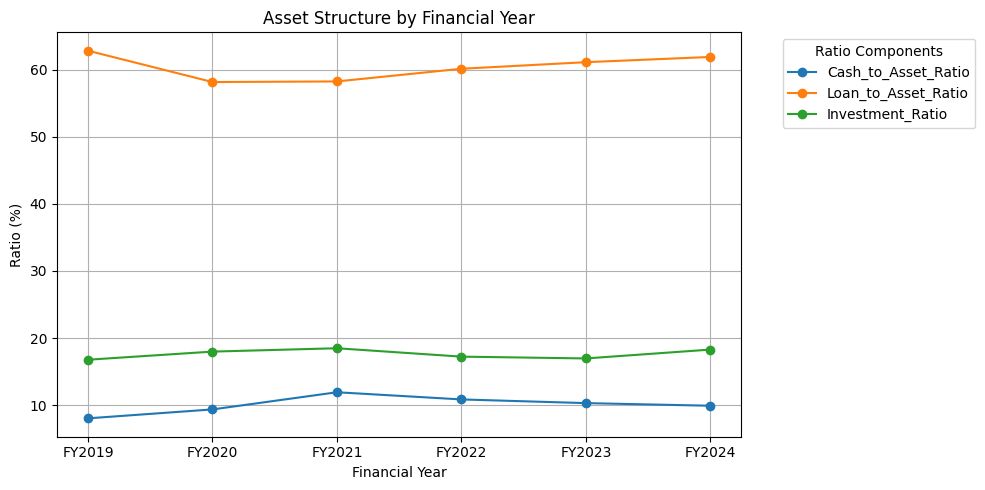

In [ ]:
# Plot asset structure by year
asset_structure_by_fy.plot(x='Financial_Year', marker='o', figsize=(10, 5))
plt.title('Asset Structure by Financial Year')
plt.ylabel('Ratio (%)')
plt.xlabel('Financial Year')
plt.grid(True)
plt.legend(title='Ratio Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observations – Asset Structure by Financial Year:

- `Loan-to-Asset Ratio` is the highest, around 58–62%, and slightly increased over time.

- `Cash-to-Asset Ratio` peaked in FY2021 and then slowly declined.

- `Investment Ratio` was steady with small changes across the years.

- Overall, the asset structure was stable from FY2019 to FY2024, with a small shift from cash to loans.

Conclusion:

- From FY2019 to FY2024, the `loan-to-asset ratio` remained the largest component, showing that lending stayed at the core of bank strategies.

- `Cash ratios` rose sharply during FY2021, likely due to COVID-19 responses, and then slowly declined.

- `Investment ratios` were more stable, with small ups and downs.

- Overall, the structure shifted slightly over time, with some increase in loans and reduction in cash after the crisis period.

### **Average asset composition by Period**

In [ ]:
# Average composition by custom economic periods
asset_structure_by_period = (
    data
    .groupby('Period_Label')[
        ['Cash_to_Asset_Ratio', 'Loan_to_Asset_Ratio', 'Investment_Ratio']
    ]
    .mean()
    .round(2)
    .reset_index()
)

display(asset_structure_by_period)


,Period_Label,Cash_to_Asset_Ratio,Loan_to_Asset_Ratio,Investment_Ratio
0,Crisis,9.36,58.17,17.98
1,Pressure,10.30,61.13,16.96
2,Rate Hikes,10.85,60.15,17.23
3,Rebalancing,9.91,61.91,18.28
4,Recovery,11.92,58.26,18.48
5,Stable,8.03,62.84,16.77


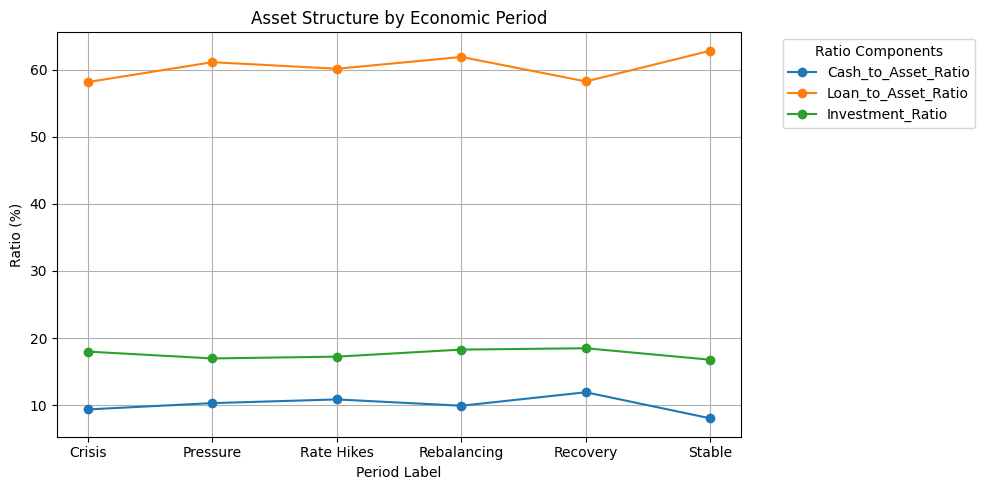

In [ ]:
# Plot asset structure by period
asset_structure_by_period.plot(x='Period_Label', marker='o', figsize=(10, 5))
plt.title('Asset Structure by Economic Period')
plt.ylabel('Ratio (%)')
plt.xlabel('Period Label')
plt.grid(True)
plt.legend(title='Ratio Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observations – Asset Structure by Economic Period:

- In Recovery, banks held the most cash. Cash ratio was also high in Pressure and Rate Hikes.

- In Crisis, loan ratio dropped. It went up again in Rebalancing and Stable.

- Investment ratio stayed mostly stable. It dropped a little in the Pressure period.

Conclusion:

- Banks held more cash during the Recovery, Pressure, and Rate Hike periods — showing a strong focus on liquidity and safety.

- Loan ratios were lowest during the Crisis, then increased in the Rebalancing and Stable periods as banks returned to lending.

- Investment ratios stayed mostly stable, with a small drop in the Pressure phase. This shows that banks adjusted their asset mix based on the economic situation — keeping more cash in uncertain times and lending more when conditions improved.

### **Asset Structure by Bank Group**

In [ ]:
# Calculate average asset structure by Hybrid Group
asset_structure_by_group = (
    data.groupby('Hybrid Group', observed=False)[
        ['Cash_to_Asset_Ratio', 'Loan_to_Asset_Ratio', 'Investment_Ratio', 'Trading_Ratio']
    ]
    .mean()
    .round(2)
    .reset_index()
)

# Set Trading Ratio = 0 for Medium and Small banks
asset_structure_by_group.loc[
    asset_structure_by_group['Hybrid Group'].isin(['Medium', 'Small']),
    'Trading_Ratio'
] = 0

display(asset_structure_by_group)


,Hybrid Group,Cash_to_Asset_Ratio,Loan_to_Asset_Ratio,Investment_Ratio,Trading_Ratio
0,Big Four,5.91,65.38,6.64,2.84
1,Large,5.89,57.51,13.35,1.93
2,Medium,7.90,65.04,19.37,0.00
3,Small,22.42,50.12,20.04,0.00


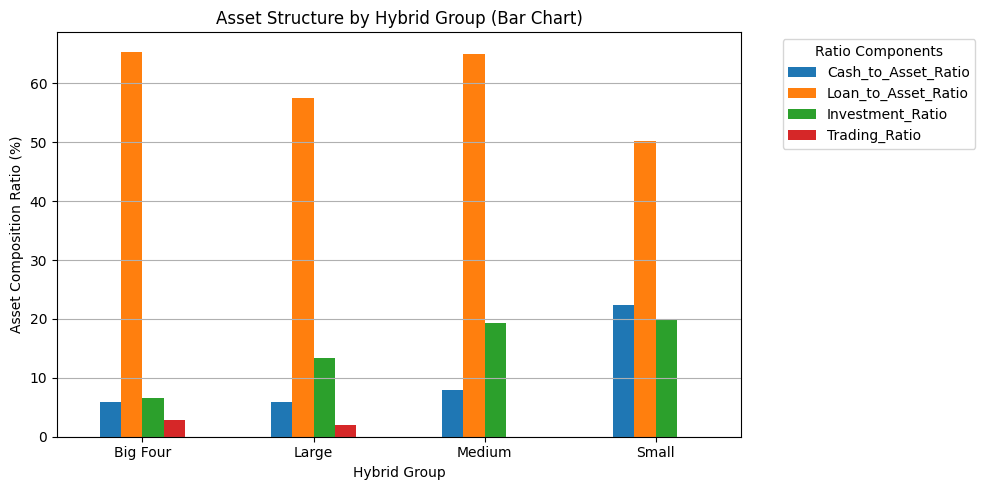

In [ ]:
# Plot asset structure by bank group
asset_structure_by_group.set_index('Hybrid Group').plot(kind='bar', figsize=(10, 5))

plt.title('Asset Structure by Hybrid Group (Bar Chart)')
plt.ylabel('Asset Composition Ratio (%)')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Ratio Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observation – Asset Structure by Hybrid Group:

- Big Four banks use most of their assets for loans, showing a focus on traditional lending.

- Small and Medium banks have higher shares in investment and cash, which suggests a more conservative or diversified strategy.

- Trading ratio is very small in both Big Four and Large banks, confirming it is not a popular method.



In [ ]:
# Group by Financial Year and Hybrid Group
trend_as = (
    data.groupby(['Financial_Year', 'Hybrid Group'], observed=False)[
        ['Cash_to_Asset_Ratio', 'Loan_to_Asset_Ratio', 'Investment_Ratio']
    ]
    .mean()
    .round(2)
    .reset_index()
)

pivot_trend_as = trend_as.pivot(
    index='Financial_Year',
    columns='Hybrid Group',
    values=['Cash_to_Asset_Ratio', 'Loan_to_Asset_Ratio', 'Investment_Ratio']
)

display(pivot_trend_as)

Cash_to_Asset_Ratio                     Loan_to_Asset_Ratio  \
Hybrid Group              Big Four Large Medium  Small            Big Four   
Financial_Year                                                               
FY2019                        1.42  2.14   7.34  19.81               69.23   
FY2020                        2.32  4.78   7.90  22.15               63.83   
FY2021                        7.73  8.48   9.28  26.51               63.73   
FY2022                        9.48  7.61   7.82  24.13               62.62   
FY2023                        8.57  6.63   7.60  21.68               64.47   
FY2024                        5.96  5.89   7.42  20.82               68.39   

                                    Investment_Ratio                       
Hybrid Group    Large Medium  Small         Big Four  Large Medium  Small  
Financial_Year                                                             
FY2019          60.30  66.77  53.31             6.94  14.10  18.75  16.34  
FY2020          55.06  62.88  46.97             7.23  14.71  19.08  21.48  
FY2021          56.13  63.03  45.02             6.64  13.04  19.61  25.36  
FY2022          57.32  65.20  48.62             5.55  12.27  19.69  18.41  
FY2023          57.64  65.97  52.02             6.08  12.14  18.87  19.07  
FY2024          58.73  66.40  53.43             7.39  13.67  20.21  20.13

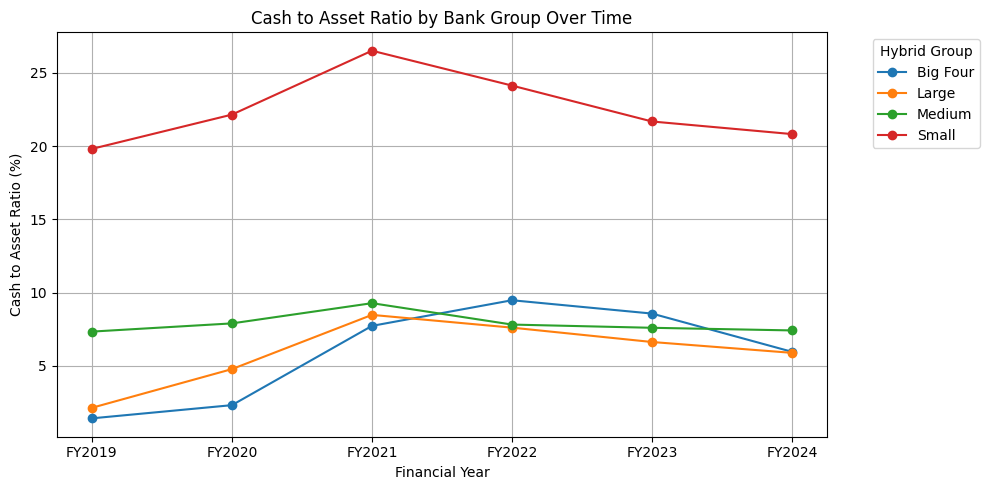

In [ ]:
# Plot Cash to Asset Ratio over time by group
pivot_trend_as['Cash_to_Asset_Ratio'].plot(marker='o', figsize=(10, 5))
plt.title('Cash to Asset Ratio by Bank Group Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Cash to Asset Ratio (%)')
plt.grid(True)
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Observation – Cash to Asset Ratio by Financial Year:

- The cash ratio increased during FY2021 for all groups, likely due to COVID-19 recovery strategies.

- Small banks always held a high level of cash across years, while Big Four and Large banks kept their cash ratio low but steady.

- After FY2021, cash ratios declined slightly, showing a shift away from liquid assets.

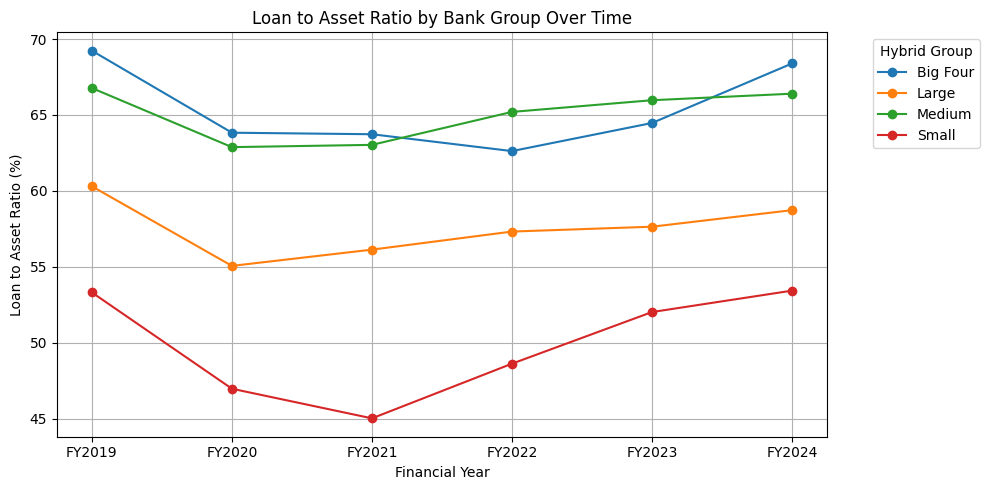

In [ ]:
# Plot Loan to Asset Ratio over time by group
pivot_trend_as['Loan_to_Asset_Ratio'].plot(marker='o', figsize=(10, 5))
plt.title('Loan to Asset Ratio by Bank Group Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Loan to Asset Ratio (%)')
plt.grid(True)
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observation – Loan to Asset Ratio by Financial Year:

- Big Four banks had the highest loan ratio overall. After a drop in FY2020–FY2022, they increased sharply in FY2023 and FY2024.

- Medium banks had a dip in FY2020–FY2021 but then stayed stable around 65–66%.

- Large banks had the lowest loan ratio among the top 3 groups, with a slow and steady increase across the years.

- Small banks had the biggest changes — loan ratio dropped to 45% in FY2021, then rose again, reaching back to 53% in FY2024.

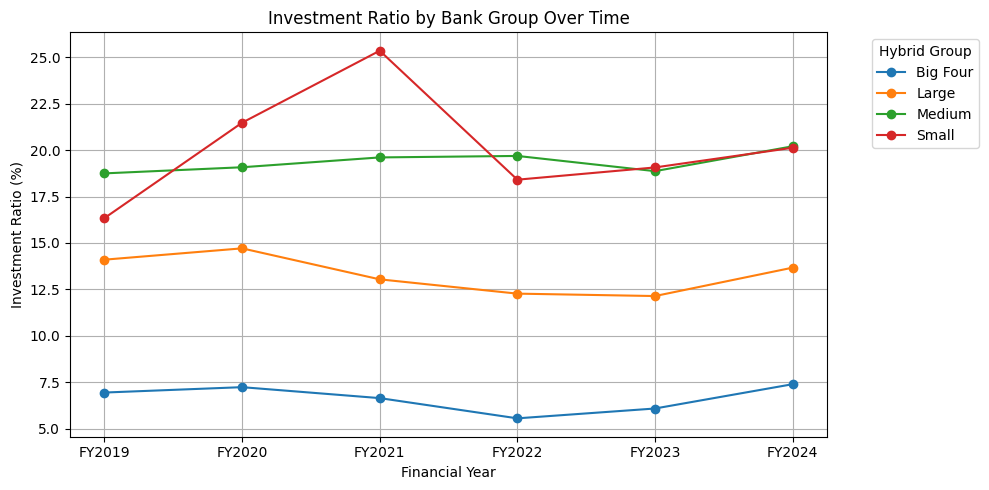

In [ ]:
# Plot Investment Ratio over time by group
pivot_trend_as['Investment_Ratio'].plot(marker='o', figsize=(10, 5))
plt.title('Investment Ratio by Bank Group Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Investment Ratio (%)')
plt.grid(True)
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observation – Investment Ratio by Financial Year:

- Small banks had the highest investment ratio, especially in FY2021 (over 25%), then dropped but stayed high.

- Medium banks kept their investment ratio stable, around 19–20% across all years.

- Large banks had a slight decline from FY2020 to FY2023, then increased again in FY2024.

- Big Four had the lowest investment ratio but showed a slow rise after FY2022.

Conclusion:

- Big Four banks focused mainly on lending, with over 65% of their assets in loans.

- Medium and Small banks were more balanced — they kept more cash and investments than Big Four.

- Trading activity mostly happened in Big Four and Large banks. Other banks almost didn’t use it.

- Over time, Small banks reduced cash and gave more loans. Big Four slowly increased their investment share.

→ Each group followed a different strategy based on their size and risk level.

### **ANSWER FOR QUESTION: How did the asset structure change in different periods?**

From FY2019 to FY2024, the asset structure of Australian banks changed in response to shifts in the economic environment, interest rate policies, and funding conditions.

In FY2020 (Crisis Period), banks increased their cash holdings significantly as the RBA cut interest rates to record lows during COVID-19. This made banks focus more on liquidity and safety, which led to a clear rise in Cash-to-Asset ratios. At the same time, loan ratios dropped slightly, reflecting lower demand for credit during the pandemic.

In the Recovery period (FY2021–FY2022), loan ratios increased again as economic conditions improved and borrowing activity resumed. Cash ratios decreased slightly, showing a move away from conservative positions. Investment ratios stayed stable, suggesting banks kept a balanced approach in uncertain times.

During the Rate Hike and Pressure periods (FY2023–FY2024), the RBA increased interest rates to fight inflation. Banks adjust again. Loan ratios continued to rise across most bank groups, while cash ratios declined further. Big Four banks also increased their investment ratios during these periods, possibly to secure long-term returns in a higher interest rate environment.

Looking across bank groups, Big Four banks kept the most lending-focused structure with over 65% of total assets in loans. Small banks had the most cash-heavy structure, holding over 20% in cash, likely to remain flexible under pressure. Trading securities were only used by Big Four banks, while medium and small banks had almost none.

Overall, the data shows banks reacted actively to economic shifts: more cash during crises, more lending during recovery, and balanced moves during periods of tightening. Different bank groups followed different strategies, with Big Four staying lending-heavy and smaller banks remaining more defensive.

## **How do different bank groups manage capital?**

### **Special Case Analysis: Short Term Borrowing and Securitised Ratio**

According to banking theory (based on Rose & Hudgins, Bank Management and Financial Services, 10th Edition), a bank’s capital and funding strategy can be assessed using several balance sheet components, each reflecting a different financial approach:

Cash and deposits → Liquidity and safety

Customer deposits → Stable funding from core clients

Short-term borrowings → Use of market-based, short-term funds

Securitised assets → Off-balance sheet risk transfer

Investment securities → Long-term income stability

When applying this framework to the APRA dataset (2019–2025), I found:

- `Total short-term borrowings` are zero in 35% of rows, and `Total long-term borrowings` are zero in 43% of rows. This makes the `ShortTerm_Borrowing_Ratio` unstable in many cases.

- `Total securitised assets on balance sheet` are zero in 61.8% of rows, which means the `Securitised_Asset_Ratio` has very limited coverage.

Therefore, I kept only the three most representative and reliable ratios: `Cash_to_Asset_Ratio`, `Deposit_to_Asset_Ratio`, and `Investment_Ratio`.
The `ShortTerm_Borrowing_Ratio` and `Securitised_Asset_Ratio` will be examined in this section to determine whether and how they should be used in the later analysis.


In [ ]:
# Check availability of ShortTerm_Borrowing_Ratio and Securitised_Asset_Ratio
data['ShortTerm_Borrowing_Ratio_NonZero'] = (
    (data['ShortTerm_Borrowing_Ratio'] != 0)
    & data['ShortTerm_Borrowing_Ratio'].notna()
)

data['Securitised_Asset_Ratio_NonZero'] = (
    data['Securitised_Asset_Ratio'] != 0
)

# Count total rows per group
total_counts = (
    data
    .groupby(['Financial_Year', 'Hybrid Group'])
    .size()
    .reset_index(name='Total_Rows')
)

# Count rows with available ratios
zero_na_data = (
    data
    .groupby(['Financial_Year', 'Hybrid Group'])
    .agg(
        ShortTerm_Borrowing_Ratio_NonZero_Count=(
            'ShortTerm_Borrowing_Ratio_NonZero', 'sum'
        ),
        Securitised_Asset_Ratio_NonZero_Count=(
            'Securitised_Asset_Ratio_NonZero', 'sum'
        )
    )
    .reset_index()
)

# Merge and calculate percent availability
zero_na_data = zero_na_data.merge(
    total_counts,
    on=['Financial_Year', 'Hybrid Group']
)

zero_na_data['ShortTerm_Borrowing_Ratio_NonZero_%'] = (
    zero_na_data['ShortTerm_Borrowing_Ratio_NonZero_Count']
    / zero_na_data['Total_Rows'] * 100
).round(2)

zero_na_data['Securitised_Asset_Ratio_NonZero_%'] = (
    zero_na_data['Securitised_Asset_Ratio_NonZero_Count']
    / zero_na_data['Total_Rows'] * 100
).round(2)

# Select and pivot for display
zero_na_data = zero_na_data[[
    'Financial_Year', 'Hybrid Group',
    'Total_Rows',
    'ShortTerm_Borrowing_Ratio_NonZero_Count',
    'ShortTerm_Borrowing_Ratio_NonZero_%',
    'Securitised_Asset_Ratio_NonZero_Count',
    'Securitised_Asset_Ratio_NonZero_%'
]]

pivot_zero_na_data = zero_na_data.pivot(
    index='Financial_Year',
    columns='Hybrid Group',
    values=[
        'ShortTerm_Borrowing_Ratio_NonZero_%',
        'Securitised_Asset_Ratio_NonZero_%'
    ]
)

display(pivot_zero_na_data)

ShortTerm_Borrowing_Ratio_NonZero_%                       \
Hybrid Group                              Big Four  Large Medium  Small   
Financial_Year                                                            
FY2019                                       100.0  88.80  66.46  21.80   
FY2020                                       100.0  83.59  62.44  20.31   
FY2021                                       100.0  82.25  62.58  17.86   
FY2022                                       100.0  82.92  66.10  25.18   
FY2023                                       100.0  83.62  73.13  32.26   
FY2024                                       100.0  80.17  78.41  32.21   

               Securitised_Asset_Ratio_NonZero_%                      
Hybrid Group                            Big Four  Large Medium Small  
Financial_Year                                                        
FY2019                                     100.0  43.75  38.07  6.02  
FY2020                                     100.0  43.75  44.15  4.69  
FY2021                                     100.0  43.60  47.24  5.56  
FY2022                                     100.0  40.50  48.12  0.00  
FY2023                                     100.0  37.93  47.76  0.00  
FY2024                                     100.0  37.93  48.36  1.23

Observations:

Short-Term Borrowing Ratio Availability:

- For Big Four banks, ShortTerm_Borrowing_Ratio is consistently available (100%) across all financial years.

- For Large banks, the availability is high (about 80–90%), showing reliable data for analysis.

- For Medium banks, the ratio is moderate (about 60-70%).

- For Small bank, the ratio is less available (only 15–35%).

Securitised Asset Ratio Availability:

- For Big Four banks, Securitised_Asset_Ratio is consistently available (100%) across all financial years.

- For Large and Medium banks, availability is only around 40–50%.

- For Small banks, this ratio is very limited (below 6%) and mostly missing or zero.


Conclusion:

In section 5.3.2 and 5.3.3, we will keep using the three stable ratios: `Cash_to_Asset_Ratio`, `Loan_to_Asset_Ratio`, and `Investment_Ratio`.

We will also include `ShortTerm_Borrowing_Ratio` for Big Four and Large banks, and `Securitised Asset Ratio` for Big Four banks due to its good availability. Other ratios is excluded from further analysis because its availability is too limited or inconsistent.

### **Capital Strategy Trends by Financial Year**

In [ ]:
# Calculate average ratios by Financial Year across all banks
capital_strategy_by_fy = (
    data
    .groupby('Financial_Year')[
        [
            'Cash_to_Asset_Ratio',
            'Deposit_to_Asset_Ratio',
            'Investment_Ratio'
        ]
    ]
    .mean()
    .round(2)
    .reset_index()
)

display(capital_strategy_by_fy)

,Financial_Year,Cash_to_Asset_Ratio,Deposit_to_Asset_Ratio,Investment_Ratio
0,FY2019,8.03,54.59,16.77
1,FY2020,9.36,52.25,17.98
2,FY2021,11.92,52.49,18.48
3,FY2022,10.85,52.88,17.23
4,FY2023,10.30,53.11,16.96
5,FY2024,9.91,56.12,18.28


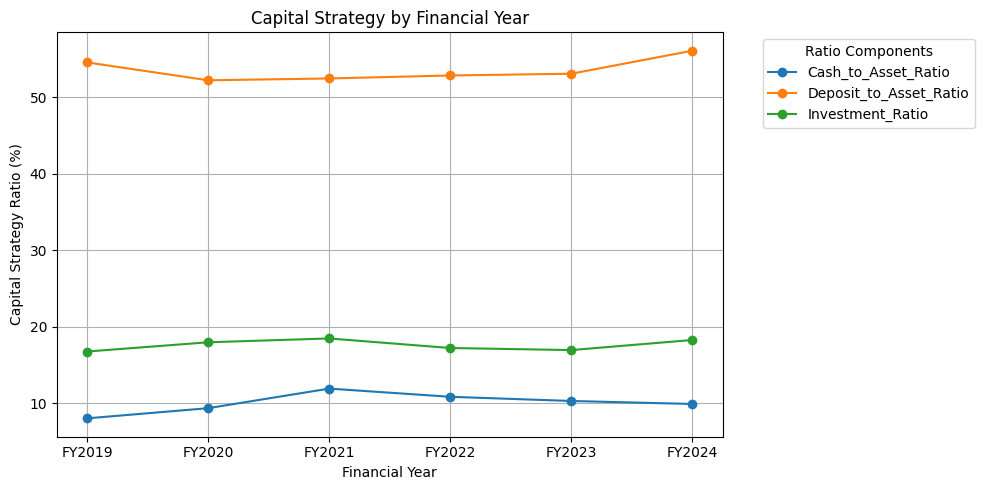

In [ ]:
# Plot capital strategy trends by Financial Year
capital_strategy_by_fy.plot(
    x='Financial_Year',
    marker='o',
    figsize=(10, 5)
)

plt.title('Capital Strategy by Financial Year')
plt.ylabel('Capital Strategy Ratio (%)')
plt.xlabel('Financial Year')
plt.grid(True)
plt.legend(title='Ratio Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observation - Capital Strategy Trends by Financial Year:

- Deposit to Asset Ratio was the largest component, staying around 54–56%.

- Cash to Asset Ratio rose in FY2021 and then slowly declined.

- Investment Ratio showed a slight decrease from FY2021 to FY2023 and recovered in FY2024.

- Overall, capital strategy stayed stable, with small shifts around FY2020 and FY 2021.

Conclusion:

- From FY2019 to FY2024, banks mainly relied on deposits for capital, showing consistent funding strategy.

- Cash ratio peaked in FY2021, likely reflecting higher liquidity needs during COVID-19.

- Investment ratio dropped slightly in FY2022–FY2023, possibly due to market volatility.

- Overall, the strategy remained steady with minor adjustments.



### **Average asset composition by Period**

In [ ]:
# Calculate average ratios by custom economic periods
capital_strategy_by_period = (
    data
    .groupby('Period_Label')[
        [
            'Cash_to_Asset_Ratio',
            'Deposit_to_Asset_Ratio',
            'Investment_Ratio'
        ]
    ]
    .mean()
    .round(2)
    .reset_index()
)

display(asset_structure_by_period)


,Period_Label,Cash_to_Asset_Ratio,Loan_to_Asset_Ratio,Investment_Ratio
0,Crisis,9.36,58.17,17.98
1,Pressure,10.30,61.13,16.96
2,Rate Hikes,10.85,60.15,17.23
3,Rebalancing,9.91,61.91,18.28
4,Recovery,11.92,58.26,18.48
5,Stable,8.03,62.84,16.77


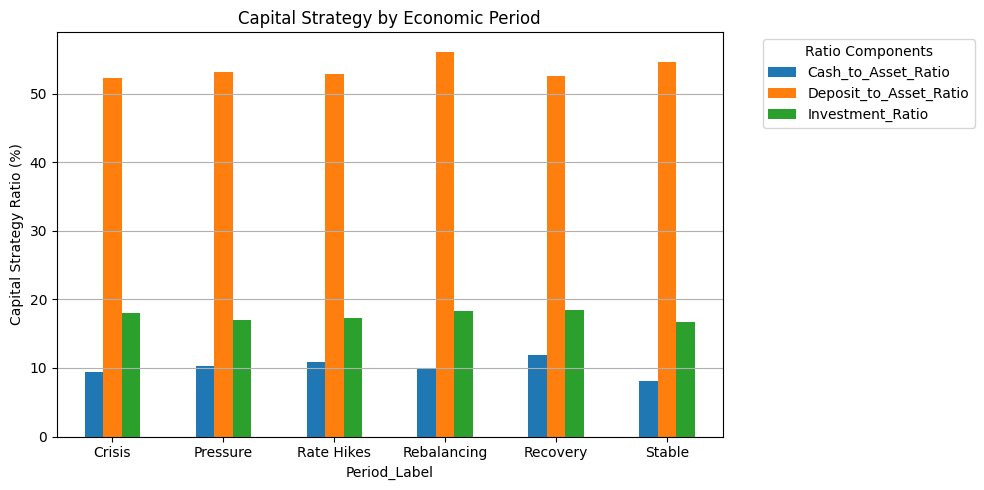

In [ ]:
# Plot capital strategy by economic period (bar chart)
capital_strategy_by_period.set_index('Period_Label').plot(
    kind='bar',
    figsize=(10, 5)
)

plt.ylabel('Capital Strategy Ratio (%)')
plt.title('Capital Strategy by Economic Period')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Ratio Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observations – Capital Strategy by Period:

- Loan ratio peaked during the Stable and Rebalancing periods.

- Cash ratio was highest during Rate Hikes and Recovery, showing a focus on liquidity.

- Investment ratio was stable, with a small dip during Pressure and Rate Hikes.

- Each period had a different mix of strategy depending on economic context.

Conclusion:

- During unstable periods, banks increased cash and reduced loans.

- In stable times, banks returned to lending focus with higher loan ratios.

- Investment strategies stayed consistent, showing long-term planning.

- Economic conditions clearly influenced the mix between cash and lending.

### **Asset Structure by Bank Group**

In [ ]:
# Calculate average ratios by Hybrid Group
capital_strategy_by_group = (
    data
    .groupby('Hybrid Group')[
        [
            'Cash_to_Asset_Ratio',
            'Deposit_to_Asset_Ratio',
            'Investment_Ratio',
            'ShortTerm_Borrowing_Ratio',
            'Securitised_Asset_Ratio'
        ]
    ]
    .mean()
    .round(2)
    .reset_index()
)

capital_strategy_by_group.loc[
    capital_strategy_by_group['Hybrid Group'].isin(['Medium', 'Small']),
    'ShortTerm_Borrowing_Ratio'
] = 0

capital_strategy_by_group.loc[
    capital_strategy_by_group['Hybrid Group'] != 'Big Four',
    'Securitised_Asset_Ratio'
] = 0

display(capital_strategy_by_group)


,Hybrid Group,Cash_to_Asset_Ratio,Deposit_to_Asset_Ratio,Investment_Ratio,ShortTerm_Borrowing_Ratio,Securitised_Asset_Ratio
0,Big Four,5.91,53.91,6.64,33.09,15.3
1,Large,5.89,40.86,13.35,45.75,0.0
2,Medium,7.90,55.11,19.37,0.00,0.0
3,Small,22.42,65.76,20.04,0.00,0.0


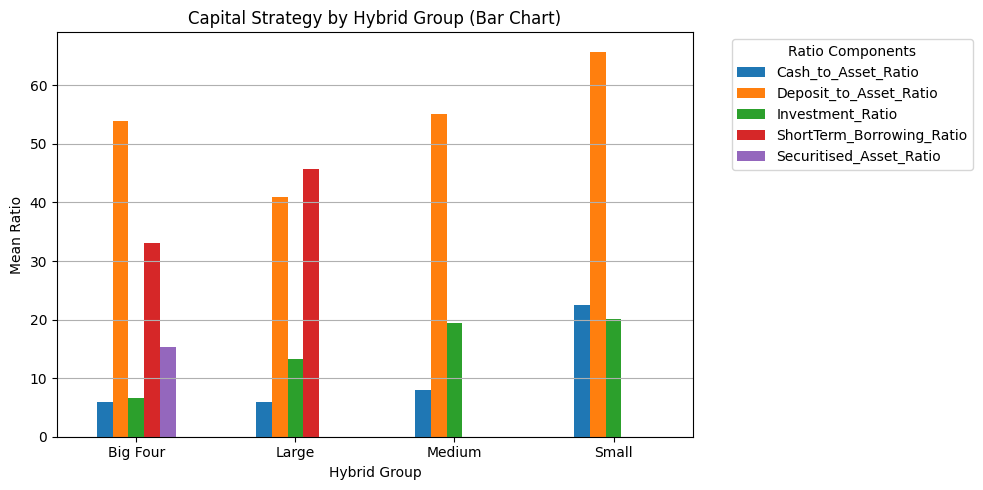

In [ ]:
# Plot bar chart comparing ratios between bank groups
capital_strategy_by_group.set_index('Hybrid Group').plot(
    kind='bar',
    figsize=(10, 5)
)

plt.title('Capital Strategy by Hybrid Group (Bar Chart)')
plt.ylabel('Mean Ratio')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Ratio Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observations – Capital Strategy by Bank Group:

- Small banks had the highest Cash to Asset Ratio (22%) and Investment Ratio (20%), showing a defensive strategy focused on liquidity and low-risk assets.

- Medium banks also allocated more to investment (19%) and held moderate levels of cash (7.5%).

- Large banks had a more balanced mix, with lower cash (5.9%) and higher investment (13%).

- Big Four banks had the lowest cash (5.9%) and investment (6.6%), but their Deposit to Asset Ratio was the highest (66%), showing reliance on stable deposit funding.

In [ ]:
# Calculate capital strategy ratios over time by Hybrid Group
trend_cs = (
    data
    .groupby(['Financial_Year', 'Hybrid Group'])[
        [
            'Cash_to_Asset_Ratio',
            'Deposit_to_Asset_Ratio',
            'Investment_Ratio'
        ]
    ]
    .mean()
    .round(2)
    .reset_index()
)

pivot_trend_cs = trend_cs.pivot(
    index='Financial_Year',
    columns='Hybrid Group',
    values=[
        'Cash_to_Asset_Ratio',
        'Deposit_to_Asset_Ratio',
        'Investment_Ratio'
    ]
)

display(pivot_trend_cs)


Cash_to_Asset_Ratio                     Deposit_to_Asset_Ratio  \
Hybrid Group              Big Four Large Medium  Small               Big Four   
Financial_Year                                                                  
FY2019                        1.42  2.14   7.34  19.81                  50.89   
FY2020                        2.32  4.78   7.90  22.15                  51.57   
FY2021                        7.73  8.48   9.28  26.51                  53.83   
FY2022                        9.48  7.61   7.82  24.13                  53.73   
FY2023                        8.57  6.63   7.60  21.68                  55.01   
FY2024                        5.96  5.89   7.42  20.82                  58.43   

                                    Investment_Ratio                       
Hybrid Group    Large Medium  Small         Big Four  Large Medium  Small  
Financial_Year                                                             
FY2019          39.57  59.21  62.76             6.94  14.10  18.75  16.34  
FY2020          41.32  53.40  65.15             7.23  14.71  19.08  21.48  
FY2021          39.73  53.58  68.12             6.64  13.04  19.61  25.36  
FY2022          39.67  53.85  66.92             5.55  12.27  19.69  18.41  
FY2023          41.90  52.75  66.35             6.08  12.14  18.87  19.07  
FY2024          43.23  57.87  65.30             7.39  13.67  20.21  20.13

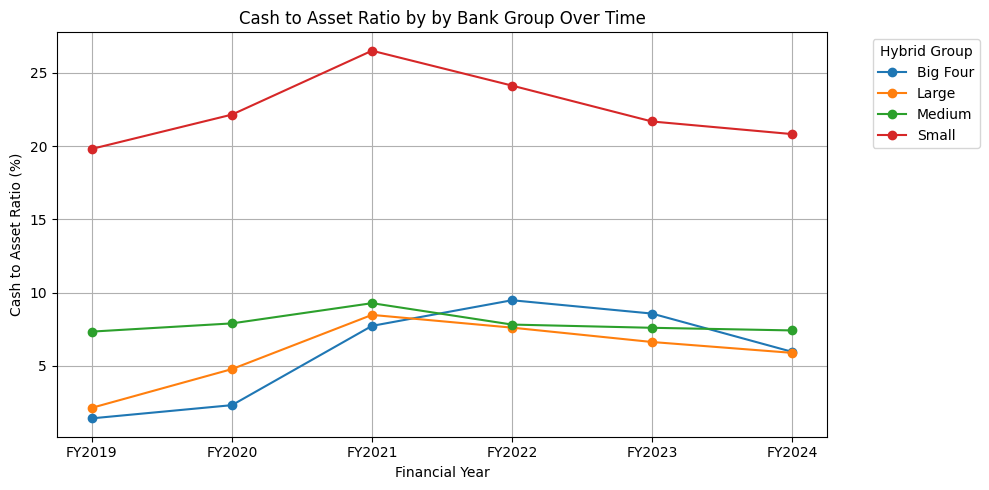

In [ ]:
# Plot trend of Cash to Asset Ratio by group
pivot_trend_cs['Cash_to_Asset_Ratio'].plot(
    marker='o',
    figsize=(10, 5)
)

plt.title('Cash to Asset Ratio by by Bank Group Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Cash to Asset Ratio (%)')
plt.grid(True)
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observation:

- Small banks held the highest cash ratio across all years, around 20–25%.

- Big Four and Medium groups increased cash in FY2021 then reduced after.

- Large banks maintained low cash ratios throughout.

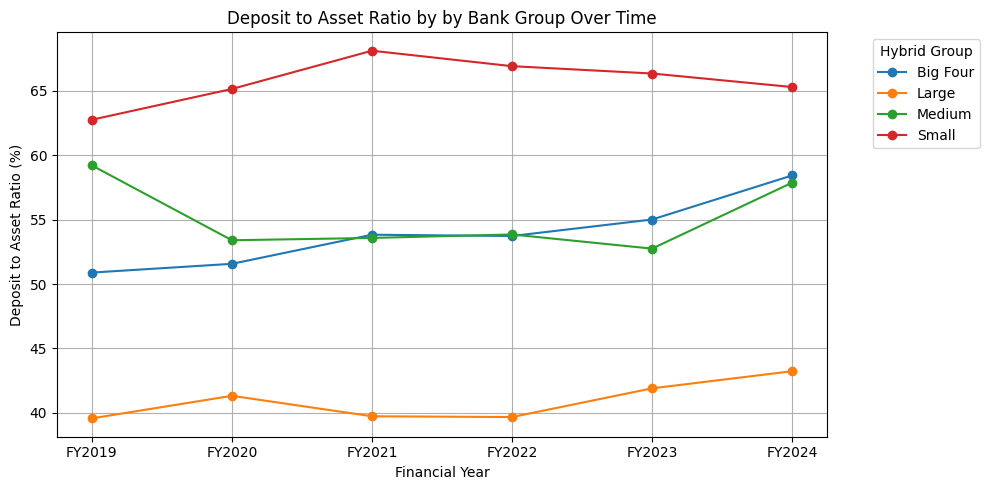

In [ ]:
# Plot trend of Deposit to Asset Ratio by group
pivot_trend_cs['Deposit_to_Asset_Ratio'].plot(
    marker='o',
    figsize=(10, 5)
)

plt.title('Deposit to Asset Ratio by by Bank Group Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Deposit to Asset Ratio (%)')
plt.grid(True)
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observation:

- Big Four had the highest deposit ratio (60% and more), showing stable funding.

- Large banks were consistently low (40%), while Medium stayed in mid-range (50%).

- Small banks improved slightly over time.

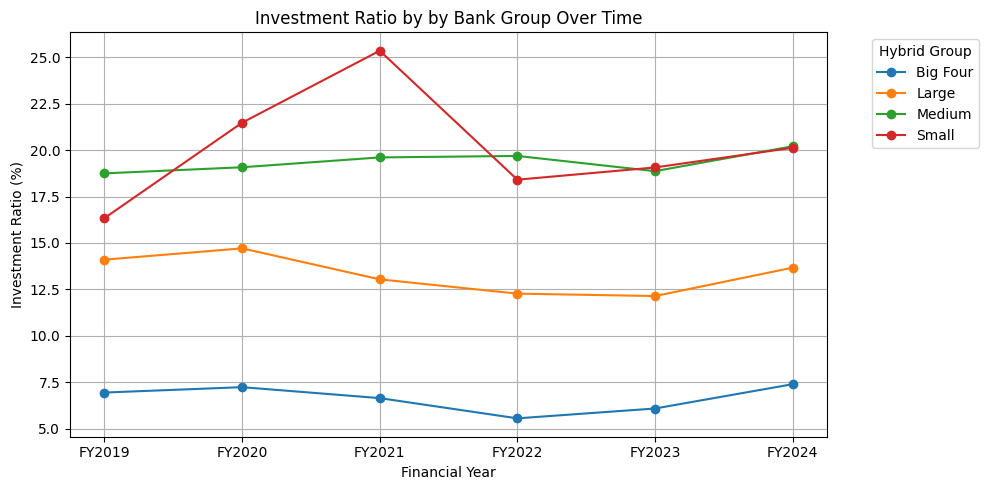

In [ ]:
# Plot trend of Investment Ratio by group
pivot_trend_cs['Investment_Ratio'].plot(
    marker='o',
    figsize=(10, 5)
)

plt.title('Investment Ratio by by Bank Group Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Investment Ratio (%)')
plt.grid(True)
plt.legend(title='Hybrid Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observation:

- Small banks led in investment ratio (up to 25%), peaking in FY2021.

- Medium banks held steady investment (18–20%).

- Big Four had the lowest investment ratio (13%).

Conclusion: Capital strategy varies significantly by bank group.

- Big Four followed a classic strategy: high deposit and low investment.

- Medium and Small banks relied more on cash and investment, with lower deposits.

- Strategy differences reflect bank size, customer base, and risk preference.

- Group-specific patterns stayed stable but adjusted slightly after FY2021.

### **ANSWER FOR QUESTION: How do different bank groups manage capital?**

From FY2019 to FY2024, Australian banks followed different capital strategies based on their size, funding sources, and responses to economic changes. These strategies were reflected in the way banks allocated assets into cash, deposits, and investments.

In FY2020 (Crisis period), banks increased cash holdings to stay liquid during the uncertainty of COVID-19. This was clearly shown by a peak in Cash to Asset Ratio, especially in Small and Medium banks. At the same time, Investment Ratios remained steady and Deposit Ratios slightly declined.

During the Recovery period (FY2021–FY2022), Deposit Ratios rose across all bank groups, showing a return to normal lending and funding strategies. Cash Ratios declined gradually as banks shifted away from liquidity hoarding. Investment strategies stayed balanced, reflecting long-term planning during the rebound.

In the Rate Hike and Pressure periods (FY2023–FY2024), Cash Ratios continued to fall while Deposit and Investment Ratios remained steady or slightly increased. This suggests banks adjusted their capital mix to manage risks under high interest rates, while still aiming for long-term returns.

Looking at differences across bank groups:

- Big Four banks relied heavily on deposits (over 65%), kept low cash (6%), and invested the least. This shows a traditional, stable strategy focused on lending.

- Large banks used a mix of deposits and investments, with moderate cash.

- Medium and Small banks had higher cash and investment ratios, with lower deposits, reflecting more defensive strategies due to limited funding options or higher risk awareness.

## **Explore unusual or missing data**

In [ ]:
# Create flags for missing or zero values in intra-group transactions and NCDs
data['Missing'] = data['Intra-group loans and finance leases'].isna()

data['IntraGroup_Loan_Zero'] = (
    data['Intra-group loans and finance leases'] == 0
)

data['IntraGroup_Deposit_Zero'] = (
    data['Intra-group deposits'] == 0
)

data['NCD_Zero'] = (
    data['Negotiable Certificates of Deposit'] == 0
)


# Sum missing/zero counts by Financial Year and Hybrid Group
missing_and_zero_count = (
    data
    .groupby(['Financial_Year', 'Hybrid Group'])[
        [
            'Missing',
            'IntraGroup_Loan_Zero',
            'IntraGroup_Deposit_Zero',
            'NCD_Zero'
        ]
    ]
    .sum()
    .reset_index()
)


# Get total number of rows per Financial Year and Hybrid Group
total_rows = (
    data
    .groupby(['Financial_Year', 'Hybrid Group'])
    .size()
    .reset_index(name='Total_Rows')
)


# Merge count and total, calculate percentage of missing or zero values
missing_and_zero_rate = missing_and_zero_count.merge(
    total_rows,
    on=['Financial_Year', 'Hybrid Group']
)

missing_and_zero_rate['Missing_%'] = (
    missing_and_zero_rate['Missing']
    / missing_and_zero_rate['Total_Rows'] * 100
).round(2)

missing_and_zero_rate['IntraGroup_Loan_Zero_%'] = (
    missing_and_zero_rate['IntraGroup_Loan_Zero']
    / missing_and_zero_rate['Total_Rows'] * 100
).round(2)

missing_and_zero_rate['IntraGroup_Deposit_Zero_%'] = (
    missing_and_zero_rate['IntraGroup_Deposit_Zero']
    / missing_and_zero_rate['Total_Rows'] * 100
).round(2)

missing_and_zero_rate['NCD_Zero_%'] = (
    missing_and_zero_rate['NCD_Zero']
    / missing_and_zero_rate['Total_Rows'] * 100
).round(2)

# Pivot data to show missing/zero rate by year and group
pivot_missing_and_zero_rate = missing_and_zero_rate.pivot(
    index='Financial_Year',
    columns='Hybrid Group',
    values=[
        'Missing_%',
        'IntraGroup_Loan_Zero_%',
        'IntraGroup_Deposit_Zero_%',
        'NCD_Zero_%'
    ]
)

display(pivot_missing_and_zero_rate)

Missing_%                     IntraGroup_Loan_Zero_%         \
Hybrid Group    Big Four Large Medium  Small               Big Four  Large   
Financial_Year                                                               
FY2019               0.0  9.38  20.44  64.66                    0.0  28.12   
FY2020               0.0  9.38  16.54  57.03                    0.0  26.56   
FY2021               0.0  9.40  16.20  61.90                    0.0  30.03   
FY2022               0.0  9.92  16.04  68.44                    0.0  34.16   
FY2023               0.0  3.45  16.42  65.81                    0.0  42.82   
FY2024               0.0  3.45  16.54  62.58                    0.0  42.82   

                             IntraGroup_Deposit_Zero_%                       \
Hybrid Group   Medium  Small                  Big Four  Large Medium  Small   
Financial_Year                                                                
FY2019          67.20  31.20                       0.0  15.89  68.79  30.45   
FY2020          71.89  37.89                       0.0  15.36  72.51  37.50   
FY2021          72.76  33.73                       0.0  18.80  72.88  33.33   
FY2022          72.78  30.50                       0.0  23.69  72.90  27.30   
FY2023          71.64  30.32                       0.0  23.28  73.51  30.32   
FY2024          72.60  33.74                       0.0  25.29  73.48  33.74   

               NCD_Zero_%                       
Hybrid Group     Big Four  Large Medium  Small  
Financial_Year                                  
FY2019                0.0  16.67  38.31  35.34  
FY2020                0.0  21.35  36.94  42.97  
FY2021                0.0  21.93  36.44  38.10  
FY2022                0.0  20.66  30.86  30.50  
FY2023                0.0  22.41  23.63  30.65  
FY2024                0.0  25.86  19.07  33.13

Observation:

- Big Four banks had complete data for all three indicators (Intra-group loans, Intra-group deposits, and NCDs) across all financial years, with no missing or zero values.

- Large banks had some missing or zero entries, but the proportion was moderate (around 10% in mising data and 15% - 40% zero data), suggesting limited but present intra-group and NCD activities.

- Medium banks showed high levels of both missing and zero values in all three indicators (around 15-20% in missing data, 20% - 40% in NCD zero data and 65% - 75% in intra-group zero data) → This indicates that these activities were either not conducted or not reported.

- Small banks exhibited a similar pattern, with combined missing and zero rates often exceeding 90% for all three variables → This indicates that these activities were never used in these banks.

Conclusion:

- From FY2019 to FY2024, Medium and Small banks showed almost no engagement in Intra-group lending, Intra-group deposits, or Negotiable Certificates of Deposit (NCDs).

- In contrast, Big Four and, to some extent, Large banks consistently reported these items.

→ This highlights a structural difference in financial operations and scale between bank groups



---



# **Conclusion and Recommendation**

## **Conclusion**

Over the period from FY2019 to FY2024, the Australian banking system experienced moderate and stable growth, shaped by global disruptions, local recovery efforts, and monetary tightening cycles.

Bank asset growth peaked during the low-interest recovery between FY2020 and FY2022, but began to slow down from FY2023 as interest rates rose. The Big Four banks remained dominant, although other banks gradually expanded their presence.

In terms of asset structure, banks adjusted their portfolios based on economic context: increasing cash during crisis periods, lending more during recovery, and rebalancing again under high interest rates. Bank groups differed in strategy — Big Four banks focused on loans, while Medium and Small banks held more cash and investments, showing a more cautious stance.

Regarding capital strategy, bank groups followed distinct approaches. The Big Four relied on deposits, maintained conservative investment ratios, and showed consistency throughout. In contrast, smaller banks adopted more flexible capital strategies, influenced by their market roles and risk appetites. Despite short-term shifts, most banks remained aligned with their structural strategies over time.


## **Recommendation**

To support stability and competitiveness in the sector:

- **Regulators** should continue to monitor shifts in capital strategy and asset allocation, especially in response to interest rate changes, as they reveal early signs of systemic stress or strategic overexposure.

- **Smaller banks** may benefit from clearer diversification frameworks, particularly in how they balance cash, investment, and lending activities across economic cycles.

- **Investors and analysts** should not only track total asset growth but also examine composition trends and group-specific behaviors, which provide deeper insight into each bank’s resilience and strategic direction.

- For future research or policy review, comparing bank responses during stress periods (for example: COVID-19, rate hikes) versus stable periods offers valuable understanding of systemic flexibility and market adaptation.

In conclusion, while the Australian banking system has shown strong fundamentals, strategic differences across bank groups highlight the need for tailored approaches in both risk supervision and financial planning.